## 1. Imports and Setup
We import necessary libraries and set up custom plot configurations for consistency.

In [17]:

# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Directory setup for custom modules
import sys
module_path = '../../eagleeye'
sys.path.append(module_path)
import EagleEye
import From_data_to_binary

# Custom plotting settings
sns.set(style="darkgrid")
plt.rcParams.update({
    'axes.titlesize': 21,
    'axes.labelsize': 17,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 17,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': 'gray'
})


## 2. Plotting and Visualization
This section defines functions and visualizations for analyzing and displaying $\Upsilon$ sequences.

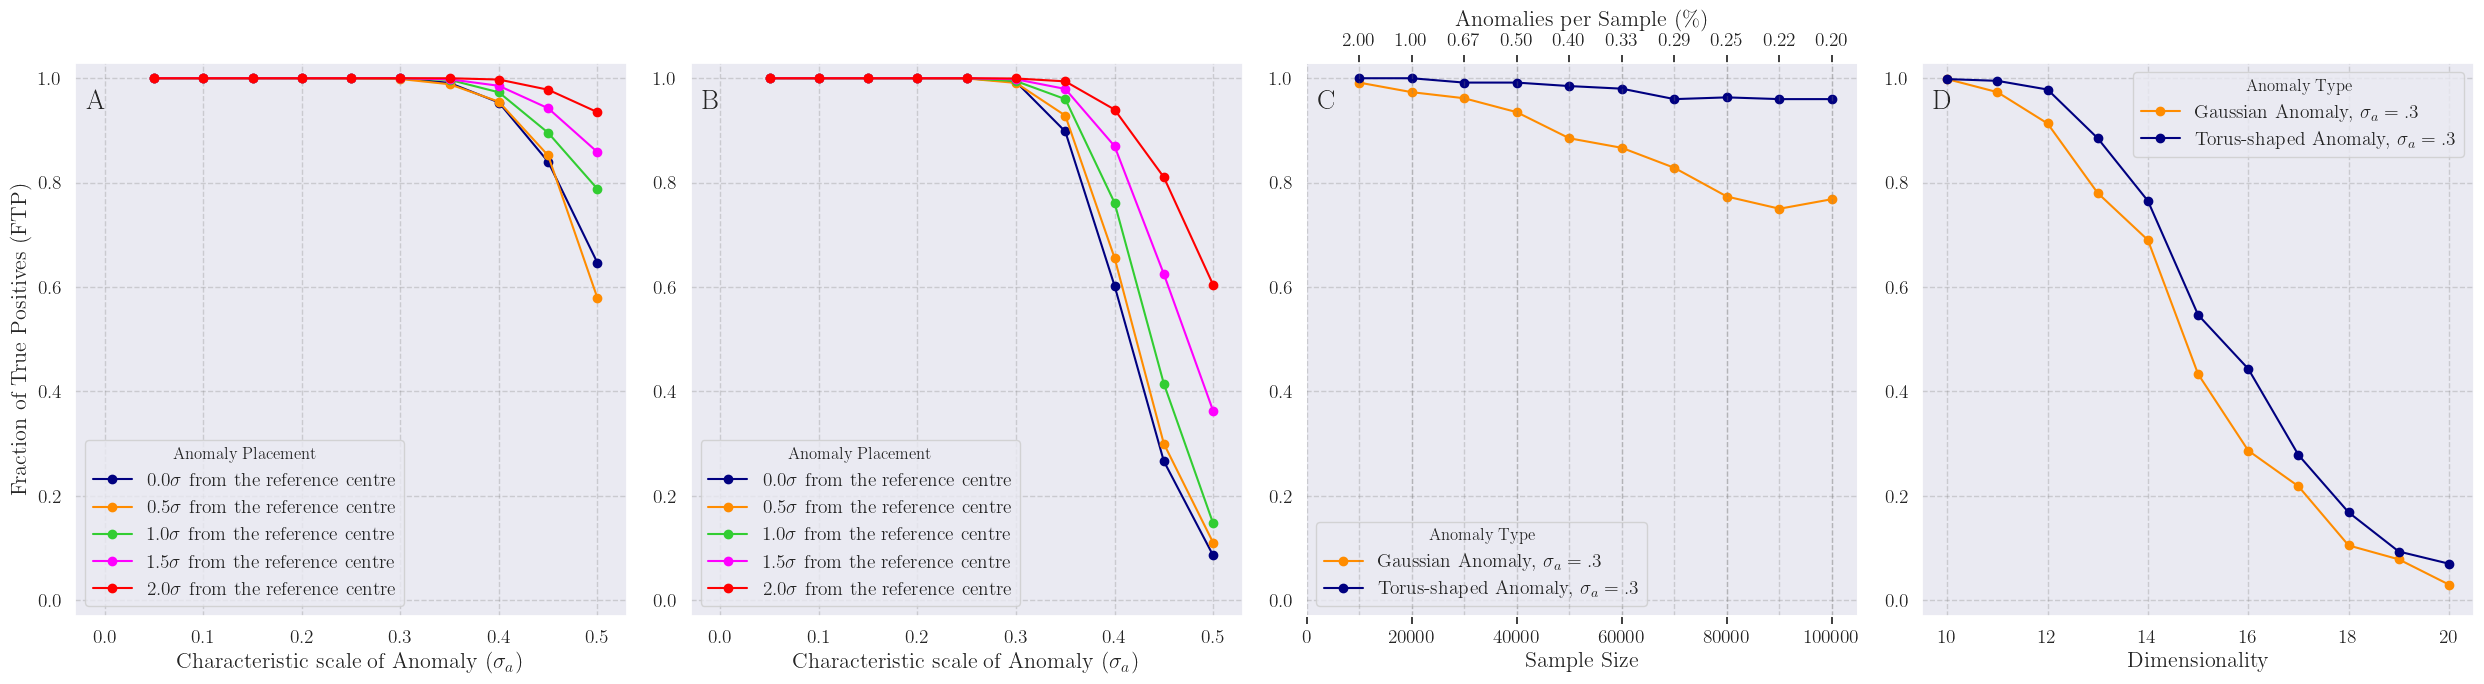

In [18]:
# load the results

F5PA = np.load( 'results/EE_Fig5_pannel_A.npy' )

F5PB = np.load( 'results/EE_Fig5_pannel_B.npy' )

F5PC1 = np.load( 'results/EE_Fig5_pannel_C_1.npy' )
F5PC2 = np.load( 'results/EE_Fig5_pannel_C_2.npy' )

F5PD1 = np.load( 'results/EE_Fig5_pannel_D_1.npy' )
F5PD2 = np.load( 'results/EE_Fig5_pannel_D_2.npy' )

# plot


plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

def set_custom_style():
    sns.set(style="darkgrid")
    plt.rcParams.update({
        'figure.figsize': (15, 15),
        'axes.titlesize': 18,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
        'font.family': 'serif',
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.linestyle': '--',
        'grid.color': 'gray'
    })

# Call the function to set the custom style
set_custom_style()

# Define x-axis (standard deviations) and positions
sigma_a = np.arange(0.05, 0.55, 0.05)
positions = np.arange(0, 2.5, 0.5)

# Define colors for each position
colors = ['navy', 'darkorange', 'limegreen', 'magenta', 'red']

###############################################################

# Create the subplot figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(25, 7))


F5PA = F5PA.mean(axis=1)
for i, pos in enumerate(positions):
    axes[0].plot(sigma_a, F5PA[:,i], label=f'{pos:.1f}$\sigma$ from the reference centre', marker='o', color=colors[i])
axes[0].set_xlabel("Characteristic scale of Anomaly ($\sigma_a$)")
axes[0].set_ylabel("Fraction of True Positives (FTP)")
axes[0].legend(title='Anomaly Placement')
axes[0].set_ylim([-.03, 1.03])
axes[0].set_xlim([-.03, 0.53])

###

F5PB = F5PB.mean(axis=1)
for i, pos in enumerate(positions):
    axes[1].plot(sigma_a, F5PB[:, i], label=f'{pos:.1f}$\sigma$ from the reference centre', marker='o', color=colors[i])
axes[1].set_xlabel("Characteristic scale of Anomaly ($\sigma_a$)")

axes[1].legend(title='Anomaly Placement')
axes[1].set_ylim([-.03, 1.03])
axes[1].set_xlim([-.03, 0.53])

###
Samp_Siz_range = range(10000,100000+1,10000)
F5PC1 = F5PC1.mean(axis=1)
F5PC2 = F5PC2.mean(axis=1)
axes[2].plot(Samp_Siz_range, F5PC1, label='Gaussian Anomaly, $\sigma_a = .3$', marker='o', color='darkorange')
axes[2].plot(Samp_Siz_range, F5PC2, label='Torus-shaped Anomaly, $\sigma_a = .3$', marker='o', color='navy')
axes[2].set_xlabel("Sample Size")
axes[2].legend(title='Anomaly Type')
axes[2].set_ylim([-.03, 1.03])
axes[2].set_xlim([-5, 100000+5000])

# Create the second x-axis (twinned axis)
ax2b = axes[2].twiny()

# Match the positions of the ticks
ax2b.set_xticks(range(10000,100000+1,10000))
ax2b.set_xlim(axes[2].get_xlim())  # Align the second x-axis with the first
dilution_percentage = 200/np.array(range(10000,100000+1,10000))*100
# Set the second x-axis to show the dilution of anomalies
ax2b.set_xlabel('Anomalies per Sample ($\%$)')
ax2b.set_xticklabels([f'{d:.2f}%' for d in dilution_percentage])

###
Extra_Dim = range(10,21,1)
F5PD1 = F5PD1.mean(axis=1)
F5PD2 = F5PD2.mean(axis=1)

axes[3].plot(Extra_Dim, F5PD1, label='Gaussian Anomaly, $\sigma_a = .3$', marker='o', color='darkorange')
axes[3].plot(Extra_Dim, F5PD2, label='Torus-shaped Anomaly, $\sigma_a = .3$', marker='o', color='navy')
axes[3].set_xlabel("Dimensionality")
axes[3].legend(title='Anomaly Type')
axes[3].set_ylim([-.03, 1.03])

###

# Adding labels to each subplot
labels = ['A', 'B', 'C', 'D']
for ax, label in zip(axes, labels):
    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()


In [61]:
#%% function to compute the NLPval
def compute_upsilon_values(binary_sequences, kstar_range, num_cores):
    p_value_data = EagleEye.PValueCalculatorParallel(binary_sequences, kstar_range, num_cores = num_cores).smallest_pval_info
    
    upsilon_values = -np.log(np.array(p_value_data['min_pval']))
    kstar_values = np.array(p_value_data['kstar_min_pval'])
    
    return upsilon_values, kstar_values

In [62]:
K_M            = 100
NUM_CORES      = 16
NEIGHBOR_RANGE = range(4, K_M)

np.random.seed(77)
bernoulli_matrix = np.random.binomial(n=1, p=0.5, size=(200000, K_M))
NLPval_bernulli, kstar_bernulli = compute_upsilon_values(bernoulli_matrix, kstar_range=NEIGHBOR_RANGE, num_cores= NUM_CORES)
quantiles = [ 0.999, 0.9995, 0.9999, 0.99995,0.99999]
quantiles_tbp = np.quantile( NLPval_bernulli, quantiles )  
np.random.seed()

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.


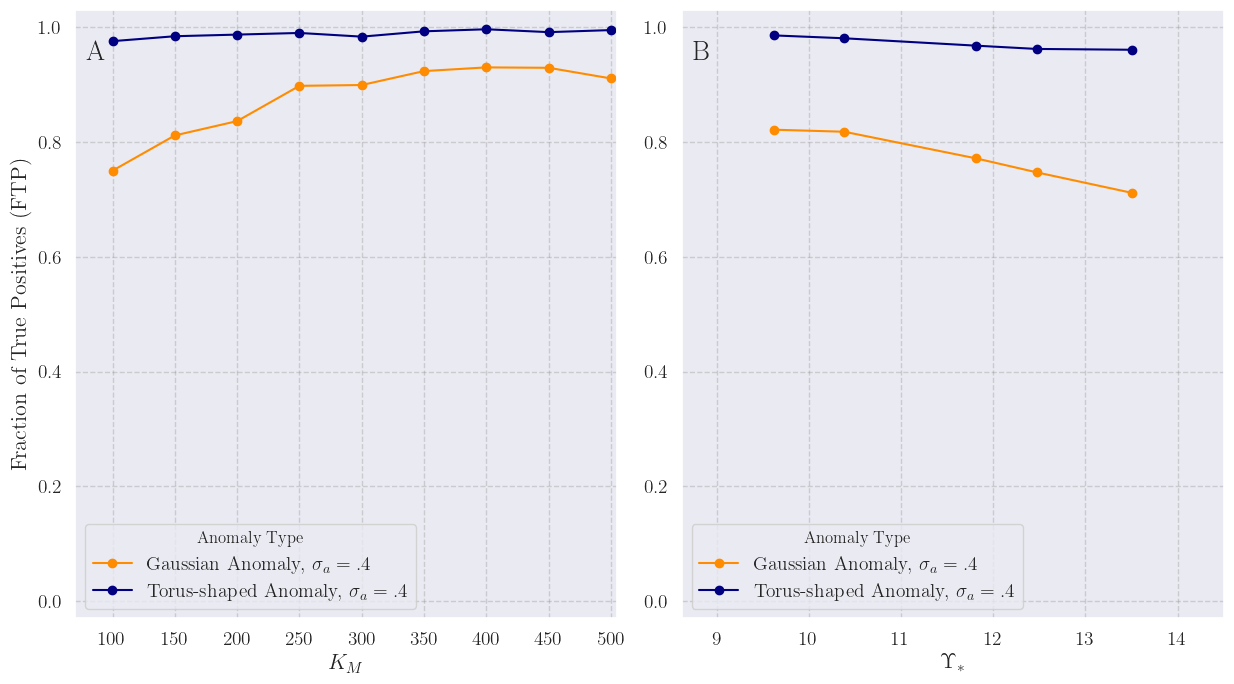

In [84]:
K_M_range =list(range(100,501,50))
F6PA1 = np.load( 'results/EE_Fig6_pannel_A_1.npy' ).mean(axis=1)
F6PA2 = np.load( 'results/EE_Fig6_pannel_A_2.npy' ).mean(axis=1)

F6PB1 = np.load( 'results/EE_Fig6_pannel_B_1.npy' ).mean(axis=1)
F6PB2 = np.load( 'results/EE_Fig6_pannel_B_2.npy' ).mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12.5, 7))


axes[0].plot(K_M_range, F6PA1, label='Gaussian Anomaly, $\sigma_a = .4$', marker='o', color='darkorange')
axes[0].plot(K_M_range, F6PA2, label='Torus-shaped Anomaly, $\sigma_a = .4$', marker='o', color='navy')
axes[0].set_xlabel("$K_M$")
axes[0].set_ylabel("Fraction of True Positives (FTP)")
axes[0].legend(title='Anomaly Type')
axes[0].set_xlim([K_M_range[0]-30, K_M_range[-1]+5])
axes[0].set_ylim([-.03, 1.03])

axes[1].plot(quantiles_tbp, F6PB1, label='Gaussian Anomaly, $\sigma_a = .4$', marker='o', color='darkorange')
axes[1].plot(quantiles_tbp, F6PB2, label='Torus-shaped Anomaly, $\sigma_a = .4$', marker='o', color='navy')
axes[1].set_xlabel(r'$\Upsilon_{*}$')
axes[1].legend(title='Anomaly Type')
axes[1].set_xlim([quantiles_tbp[0]-1, quantiles_tbp[-1]+1])
axes[1].set_ylim([-.03, 1.03])

# Adding labels to each subplot
labels = ['A', 'B']
for ax, label in zip(axes, labels):
    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()


## 3. Data Generation and Preparation
This section defines functions for generating random data points and constructing datasets with anomalies.

In [64]:
# Functions for generating random points and data with anomalies
def generate_random_points(num_points, num_dimensions, radius, shift_factor=.5):
    """Generates random points in 3D with specified characteristic scale."""
    theta, phi = np.random.uniform(0, 2 * np.pi, (2, num_points))
    x = (radius + radius / 6 * np.cos(phi)) * np.cos(theta) + shift_factor
    y = (radius + radius / 6 * np.cos(phi)) * np.sin(theta) 
    z = (radius / 6) * np.sin(phi)
    if num_dimensions > 3:
        #noise = np.random.normal(0, radius / 2, (num_points, num_dimensions - 3))
        mean = np.random.normal(0, radius, num_dimensions - 3)
        covariance = np.eye(num_dimensions - 3) *radius**2  
        noise = np.random.multivariate_normal(mean, covariance, num_points)
        
        points = np.column_stack((x, y, z, noise))
    else:
        points = np.column_stack((x, y))
    return points



#def generate_donuts(dim, sizes,R, sig):
def generate_data_with_torus_anomalies(num_dimensions, cluster_sizes, anomaly_radius, shift_factors):
    samples = []
    
    samples.append(np.random.multivariate_normal(np.array([0] + [0] * (num_dimensions - 1)), np.eye(num_dimensions), sizes[0]))
    samples.append( generate_random_points(cluster_sizes[1], num_dimensions,anomaly_radius, shift_factors) )
    if len(sizes)>2:
        samples.append( generate_random_points(cluster_sizes[2], num_dimensions,anomaly_radius, shift_factors) )
    return np.vstack(samples)


def generate_gaussian_mixture(dim, sizes, means, covariances):
    samples = []
    for mean, cov, size in zip(means, covariances, sizes):
        samples.append(np.random.multivariate_normal(mean, cov, size))
    return np.vstack(samples)


#def setup_gaussian_components(dim=10,s1=3000,sig=0.5):
def setup_gaussian_components(num_dimensions=10, background_size=10000, shift_factors = 0.5):
    m1D1, m1D2 = -shift_factors, 0
    m2D1, m2D2 = +shift_factors, 0
    sizes = [background_size, 200,1]
    means = [np.array([0] * (num_dimensions)), np.array([m1D1, m1D2] + [0] * (num_dimensions - 2)), np.array([m2D1, m2D2] + [0] * (num_dimensions - 2))]
    cstd2 = 0.01 + np.random.rand() * 0.02
    return num_dimensions, sizes, means, cstd2


### 3.1 Fig 5, pannel A and B


In [67]:
K_M            = 100
NUM_CORES      = 16
NEIGHBOR_RANGE = range(4, K_M)

np.random.seed(77)
bernoulli_matrix = np.random.binomial(n=1, p=0.5, size=(200000, K_M))
NLPval_bernulli, kstar_bernulli = compute_upsilon_values(bernoulli_matrix, kstar_range=NEIGHBOR_RANGE, num_cores= NUM_CORES)
quantiles = [ 0.999, 0.9995, 0.9999, 0.99995,0.99999]
quantiles_tbp = np.quantile( NLPval_bernulli, quantiles )  
np.random.seed()

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.


In [68]:
crit_val = np.quantile( NLPval_bernulli, 0.9999 ) #    11.7
num_dimensions=10
background_size=10000

sigs = list(np.arange(0, 2.5, 0.5))

sigma_a = list(np.arange(0.05, 0.55, 0.05))
repp = 10 # number of repetitions
F5PA = np.zeros( ( len(sigma_a), repp, 5) )
F5PB = np.zeros( ( len(sigma_a), repp, 5) )
for ss in range(len(sigs)): 
    #loop over different center locations
    sig=sigs[ss]
    dim, sizes, means, cstd2 = setup_gaussian_components(num_dimensions=num_dimensions, background_size=background_size, shift_factors = sig)

    
    for ii in range( len(sigma_a) ):
        #loop over different sigmas of the contamination
        for jj in range(repp):
            # loop over repetitions
            cstd1 = sigma_a[ii]
            covariances = [np.eye(dim), cstd1**2 * np.eye(dim), cstd2 * np.eye(dim)]
            
            reference_data = np.random.multivariate_normal(np.array([0] + [0] * (dim - 1)), np.eye(dim), np.array(sizes).sum())
            
            MSG = generate_gaussian_mixture(dim, sizes, means, covariances)
            MST = generate_data_with_torus_anomalies(num_dimensions=dim, cluster_sizes=sizes, anomaly_radius=cstd1, shift_factors=sig)

            binary_sequences_anomaly_MSG, _ = From_data_to_binary.create_binary_array_cdist(
                MSG, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MSG, kstar_values_anomaly_MSG = compute_upsilon_values(
                binary_sequences_anomaly_MSG, NEIGHBOR_RANGE, NUM_CORES
            )

            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F5PB[ii,jj,ss] = TP
                        
            
            binary_sequences_anomaly_MST, _ = From_data_to_binary.create_binary_array_cdist(
                MST, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MST, kstar_values_anomaly_MST = compute_upsilon_values(
                binary_sequences_anomaly_MST, NEIGHBOR_RANGE, NUM_CORES
            )      
            
            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F5PA[ii,jj,ss] = TP            

            


Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 5/103
Processing partition 6/103
Processing partition 4/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 15/103
Processing partition 14/103
Processing partition 16/103
Processing partition 17/103
Processing partition 18/103
Processing partition 19/103
Processing partition 20/103
Processing partition 21/103
Processing partition 22/103
Processing partition 23/103
Processing partition 24/103
Processing partition 25/103
Processing partition 26/103
Processing partition 27/103
Processing partition 28/103
Processing partition 29/103
Processing partition 30/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 35/103
Processing partition 36/103
P

Processing partition 80/103
Processing partition 78/103
Processing partition 81/103
Processing partition 82/103
Processing partition 83/103
Processing partition 84/103
Processing partition 85/103
Processing partition 86/103
Processing partition 89/103
Processing partition 103/103
Processing partition 88/103
Processing partition 90/103
Processing partition 92/103
Processing partition 91/103
Processing partition 87/103
Processing partition 93/103
Processing partition 96/103
Processing partition 95/103
Processing partition 94/103
Processing partition 97/103
Processing partition 98/103
Processing partition 99/103
Processing partition 100/103
Processing partition 101/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.


Processing partition 2/103
Processing partition 1/103
Processing partition 4/103
Processing partition 7/103
Processing partition 3/103
Processing partition 5/103
Processing partition 6/103
Processing partition 8/103
Processing partition 10/103
Processing partition 9/103
Processing partition 12/103
Processing partition 11/103
Processing partition 15/103
Processing partition 14/103
Processing partition 13/103
Processing partition 16/103
Processing partition 17/103
Processing partition 18/103
Processing partition 19/103
Processing partition 20/103
Processing partition 21/103
Processing partition 23/103
Processing partition 22/103
Processing partition 24/103
Processing partition 25/103
Processing partition 26/103
Processing partition 27/103
Processing partition 28/103
Processing partition 29/103
Processing partition 30/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 35/103
Processing partition 37/103
P

Processing partition 81/103
Processing partition 83/103
Processing partition 82/103
Processing partition 84/103
Processing partition 85/103
Processing partition 86/103
Processing partition 87/103
Processing partition 88/103
Processing partition 89/103
Processing partition 103/103
Processing partition 90/103
Processing partition 91/103
Processing partition 92/103
Processing partition 93/103
Processing partition 94/103
Processing partition 95/103
Processing partition 96/103
Processing partition 97/103
Processing partition 98/103
Processing partition 99/103
Processing partition 102/103
Processing partition 100/103
Processing partition 101/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partitio

Processing partition 1/103
Processing partition 2/103
Processing partition 5/103
Processing partition 4/103
Processing partition 6/103
Processing partition 3/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partition 16/103
Processing partition 15/103
Processing partition 17/103
Processing partition 18/103
Processing partition 20/103
Processing partition 19/103
Processing partition 21/103
Processing partition 23/103
Processing partition 22/103
Processing partition 24/103
Processing partition 25/103
Processing partition 26/103
Processing partition 27/103
Processing partition 28/103
Processing partition 29/103
Processing partition 30/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 36/103
Processing partition 35/103
P

Processing partition 79/103
Processing partition 80/103
Processing partition 81/103
Processing partition 82/103
Processing partition 83/103
Processing partition 84/103
Processing partition 85/103
Processing partition 86/103
Processing partition 87/103
Processing partition 88/103
Processing partition 89/103
Processing partition 103/103
Processing partition 90/103
Processing partition 91/103
Processing partition 92/103
Processing partition 96/103
Processing partition 93/103
Processing partition 94/103
Processing partition 95/103
Processing partition 97/103
Processing partition 99/103
Processing partition 98/103
Processing partition 100/103
Processing partition 102/103
Processing partition 101/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.


Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 5/103
Processing partition 4/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 10/103
Processing partition 9/103
Processing partition 12/103
Processing partition 11/103
Processing partition 14/103
Processing partition 13/103
Processing partition 15/103
Processing partition 16/103
Processing partition 19/103
Processing partition 17/103
Processing partition 18/103
Processing partition 20/103
Processing partition 23/103
Processing partition 21/103
Processing partition 22/103
Processing partition 24/103
Processing partition 25/103
Processing partition 26/103
Processing partition 29/103
Processing partition 27/103
Processing partition 30/103
Processing partition 28/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 35/103
Processing partition 37/103
P

Processing partition 82/103
Processing partition 83/103
Processing partition 84/103
Processing partition 85/103
Processing partition 86/103
Processing partition 87/103
Processing partition 103/103
Processing partition 88/103
Processing partition 89/103
Processing partition 91/103
Processing partition 90/103
Processing partition 92/103
Processing partition 94/103
Processing partition 95/103
Processing partition 93/103
Processing partition 96/103
Processing partition 97/103
Processing partition 100/103
Processing partition 101/103
Processing partition 98/103
Processing partition 99/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processin

Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 53/103
Processing partition 54/103
Processing partition 52/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition 78/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 5/103
Processing partition 6/103
Processing partition 4/103
Processing partition 8/103
Processing partition 7/103
Processing partition 10/103
Processing partition 9/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 44/103
Processing partition 46/103
Processing partition 45/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 56/103
Processing partition 55/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 61/103
Processing partition 64/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition 78/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 3/103
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 13/103
Processing partition 12/103
Processing partition 15/103
Processing partiti

Processing partition 39/103
Processing partition 38/103
Processing partition 40/103
Processing partition 42/103
Processing partition 41/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 51/103
Processing partition 50/103
Processing partition 52/103
Processing partition 55/103
Processing partition 53/103
Processing partition 54/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 61/103
Processing partition 60/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 68/103
Processing partition 67/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition

Processing partition 87/103
Processing partition 103/103
Processing partition 88/103
Processing partition 90/103
Processing partition 89/103
Processing partition 92/103
Processing partition 93/103
Processing partition 91/103
Processing partition 94/103
Processing partition 95/103
Processing partition 96/103
Processing partition 99/103
Processing partition 97/103
Processing partition 100/103
Processing partition 98/103
Processing partition 101/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 complete

Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 50/103
Processing partition 49/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 66/103
Processing partition 64/103
Processing partition 67/103
Processing partition 65/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition 78/103
Processing partition 79/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 1/103
Processing partition 3/103
Processing partition 4/103
Processing partition 5/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partition 11/103
Processing partiti

Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 61/103
Processing partition 60/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 71/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 72/103
Processing partition 73/103
Processing partition 77/103
Processing partition 75/103
Processing partition 74/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 5/103
Processing partition 6/103
Processing partition 4/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 51/103
Processing partition 49/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 55/103
Processing partition 56/103
Processing partition 54/103
Processing partition 57/103
Processing partition 58/103
Processing partition 60/103
Processing partition 59/103
Processing partition 62/103
Processing partition 61/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 67/103
Processing partition 66/103
Processing partition 68/103
Processing partition 70/103
Processing partition 69/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 75/103
Processing partition 74/103
Processing partition 76/103
Processing partition 79/103
Processing partition 78/103
Processing partition 77/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 5/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 6/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 43/103
Processing partition 44/103
Processing partition 46/103
Processing partition 45/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 61/103
Processing partition 64/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 71/103
Processing partition 69/103
Processing partition 70/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 5/103
Processing partition 6/103
Processing partition 3/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 42/103
Processing partition 41/103
Processing partition 46/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 47/103
Processing partition 49/103
Processing partition 48/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 60/103
Processing partition 59/103
Processing partition 57/103
Processing partition 58/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 71/103
Processing partition 70/103
Processing partition 72/103
Processing partition 76/103
Processing partition 75/103
Processing partition 73/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 7/103
Processing partition 2/103
Processing partition 5/103
Processing partition 4/103
Processing partition 6/103
Processing partition 8/103
Processing partition 10/103
Processing partition 9/103
Processing partition 12/103
Processing partition 11/103
Processing partition 13/103
Processing partition 15/103
Processing partiti

Processing partition 39/103
Processing partition 42/103
Processing partition 43/103
Processing partition 41/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 53/103
Processing partition 54/103
Processing partition 52/103
Processing partition 56/103
Processing partition 55/103
Processing partition 57/103
Processing partition 60/103
Processing partition 59/103
Processing partition 58/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 67/103
Processing partition 66/103
Processing partition 68/103
Processing partition 70/103
Processing partition 69/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 4/103
Processing partition 1/103
Processing partition 7/103
Processing partition 3/103
Processing partition 2/103
Processing partition 6/103
Processing partition 5/103
Processing partition 8/103
Processing partition 10/103
Processing partition 9/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 45/103
Processing partition 43/103
Processing partition 44/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 54/103
Processing partition 53/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 60/103
Processing partition 59/103
Processing partition 61/103
Processing partition 62/103
Processing partition 64/103
Processing partition 65/103
Processing partition 63/103
Processing partition 66/103
Processing partition 67/103
Processing partition 69/103
Processing partition 70/103
Processing partition 68/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 75/103
Processing partition 74/103
Processing partition 76/103
Processing partition 77/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 13/103
Processing partition 12/103
Processing partition 15/103
Processing partiti

Processing partition 40/103
Processing partition 42/103
Processing partition 43/103
Processing partition 45/103
Processing partition 44/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 61/103
Processing partition 60/103
Processing partition 63/103
Processing partition 62/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 68/103
Processing partition 67/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 75/103
Processing partition 72/103
Processing partition 74/103
Processing partition 73/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 1/103
Processing partition 5/103
Processing partition 4/103
Processing partition 3/103
Processing partition 6/103
Processing partition 8/103
Processing partition 9/103
Processing partition 7/103
Processing partition 11/103
Processing partition 10/103
Processing partition 14/103
Processing partition 12/103
Processing partition 15/103
Processing partiti

Processing partition 41/103
Processing partition 43/103
Processing partition 45/103
Processing partition 44/103
Processing partition 46/103
Processing partition 47/103
Processing partition 49/103
Processing partition 48/103
Processing partition 51/103
Processing partition 50/103
Processing partition 53/103
Processing partition 52/103
Processing partition 54/103
Processing partition 55/103
Processing partition 58/103
Processing partition 56/103
Processing partition 57/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 63/103
Processing partition 61/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 74/103
Processing partition 73/103
Processing partition 72/103
Processing partition 79/103
Processing partition 75/103
Processing partition

Processing partition 89/103
Processing partition 90/103
Processing partition 103/103
Processing partition 88/103
Processing partition 91/103
Processing partition 92/103
Processing partition 93/103
Processing partition 94/103
Processing partition 96/103
Processing partition 95/103
Processing partition 98/103
Processing partition 97/103
Processing partition 99/103
Processing partition 100/103
Processing partition 101/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/1

Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 51/103
Processing partition 54/103
Processing partition 56/103
Processing partition 55/103
Processing partition 58/103
Processing partition 57/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 61/103
Processing partition 63/103
Processing partition 65/103
Processing partition 64/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 70/103
Processing partition 71/103
Processing partition 69/103
Processing partition 72/103
Processing partition 73/103
Processing partition 75/103
Processing partition 74/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 5/103
Processing partition 4/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 12/103
Processing partition 13/103
Processing partition 11/103
Processing partition 14/103
Processing partiti

Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 52/103
Processing partition 50/103
Processing partition 51/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 54/103
Processing partition 58/103
Processing partition 59/103
Processing partition 53/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 66/103
Processing partition 65/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 72/103
Processing partition 70/103
Processing partition 71/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition 78/103
Processing partition 79/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 2/103
Processing partition 9/103
Processing partition 8/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 14/103
Processing partition 13/103
Processing partiti

Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 50/103
Processing partition 49/103
Processing partition 48/103
Processing partition 51/103
Processing partition 53/103
Processing partition 52/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 62/103
Processing partition 61/103
Processing partition 63/103
Processing partition 60/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 70/103
Processing partition 68/103
Processing partition 69/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 78/103
Processing partition 75/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 7/103
Processing partition 3/103
Processing partition 1/103
Processing partition 4/103
Processing partition 6/103
Processing partition 8/103
Processing partition 5/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 15/103
Processing partiti

Processing partition 44/103
Processing partition 46/103
Processing partition 45/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 51/103
Processing partition 55/103
Processing partition 54/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 61/103
Processing partition 62/103
Processing partition 60/103
Processing partition 63/103
Processing partition 64/103
Processing partition 66/103
Processing partition 65/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 71/103
Processing partition 70/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 76/103
Processing partition 75/103
Processing partition 77/103
Processing partition 78/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 3/103
Processing partition 5/103
Processing partition 6/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 14/103
Processing partition 12/103
Processing partition 13/103
Processing partiti

Processing partition 44/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 54/103
Processing partition 53/103
Processing partition 55/103
Processing partition 58/103
Processing partition 56/103
Processing partition 57/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 61/103
Processing partition 64/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 70/103
Processing partition 69/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 75/103
Processing partition 74/103
Processing partition 76/103
Processing partition 78/103
Processing partition 79/103
Processing partition 77/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 1/103
Processing partition 3/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 10/103
Processing partition 11/103
Processing partition 9/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 42/103
Processing partition 43/103
Processing partition 41/103
Processing partition 45/103
Processing partition 44/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 52/103
Processing partition 51/103
Processing partition 53/103
Processing partition 54/103
Processing partition 57/103
Processing partition 56/103
Processing partition 55/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 63/103
Processing partition 62/103
Processing partition 61/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 69/103
Processing partition 68/103
Processing partition 70/103
Processing partition 72/103
Processing partition 71/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 5/103
Processing partition 6/103
Processing partition 4/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 15/103
Processing partition 14/103
Processing partiti

Processing partition 45/103
Processing partition 44/103
Processing partition 47/103
Processing partition 46/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 55/103
Processing partition 54/103
Processing partition 53/103
Processing partition 57/103
Processing partition 58/103
Processing partition 56/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 63/103
Processing partition 62/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 73/103
Processing partition 71/103
Processing partition 74/103
Processing partition 72/103
Processing partition 70/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition 80/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 3/103
Processing partition 1/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 12/103
Processing partition 11/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 40/103
Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 49/103
Processing partition 48/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 57/103
Processing partition 56/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 66/103
Processing partition 64/103
Processing partition 65/103
Processing partition 67/103
Processing partition 68/103
Processing partition 70/103
Processing partition 71/103
Processing partition 69/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 3/103
Processing partition 5/103
Processing partition 8/103
Processing partition 6/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 12/103
Processing partition 11/103
Processing partition 15/103
Processing partition 14/103
Processing partiti

Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 49/103
Processing partition 47/103
Processing partition 48/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 55/103
Processing partition 54/103
Processing partition 57/103
Processing partition 56/103
Processing partition 58/103
Processing partition 60/103
Processing partition 62/103
Processing partition 59/103
Processing partition 61/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 73/103
Processing partition 75/103
Processing partition 74/103
Processing partition 76/103
Processing partition 72/103
Processing partition 79/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 3/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 9/103
Processing partition 8/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 49/103
Processing partition 48/103
Processing partition 51/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 61/103
Processing partition 60/103
Processing partition 62/103
Processing partition 59/103
Processing partition 63/103
Processing partition 65/103
Processing partition 64/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 3/103
Processing partition 2/103
Processing partition 1/103
Processing partition 4/103
Processing partition 5/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 10/103
Processing partition 9/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 46/103
Processing partition 45/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 52/103
Processing partition 50/103
Processing partition 51/103
Processing partition 53/103
Processing partition 55/103
Processing partition 57/103
Processing partition 54/103
Processing partition 56/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 63/103
Processing partition 65/103
Processing partition 61/103
Processing partition 64/103
Processing partition 67/103
Processing partition 66/103
Processing partition 68/103
Processing partition 69/103
Processing partition 71/103
Processing partition 70/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 4/103
Processing partition 2/103
Processing partition 3/103
Processing partition 5/103
Processing partition 6/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 43/103
Processing partition 42/103
Processing partition 44/103
Processing partition 46/103
Processing partition 45/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 53/103
Processing partition 55/103
Processing partition 52/103
Processing partition 56/103
Processing partition 54/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 69/103
Processing partition 68/103
Processing partition 66/103
Processing partition 67/103
Processing partition 70/103
Processing partition 71/103
Processing partition 73/103
Processing partition 72/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 4/103
Processing partition 6/103
Processing partition 3/103
Processing partition 5/103
Processing partition 2/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 14/103
Processing partition 13/103
Processing partiti

Processing partition 38/103
Processing partition 39/103
Processing partition 41/103
Processing partition 40/103
Processing partition 43/103
Processing partition 45/103
Processing partition 42/103
Processing partition 44/103
Processing partition 47/103
Processing partition 46/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 57/103
Processing partition 55/103
Processing partition 56/103
Processing partition 59/103
Processing partition 58/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 66/103
Processing partition 65/103
Processing partition 64/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 1/103
Processing partition 3/103
Processing partition 5/103
Processing partition 4/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 12/103
Processing partition 11/103
Processing partition 13/103
Processing partition 10/103
Processing partition 14/103
Processing partiti

Processing partition 37/103
Processing partition 39/103
Processing partition 40/103
Processing partition 38/103
Processing partition 42/103
Processing partition 41/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 48/103
Processing partition 47/103
Processing partition 50/103
Processing partition 49/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 56/103
Processing partition 55/103
Processing partition 58/103
Processing partition 57/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 71/103
Processing partition 69/103
Processing partition 70/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 4/103
Processing partition 2/103
Processing partition 3/103
Processing partition 7/103
Processing partition 6/103
Processing partition 9/103
Processing partition 8/103
Processing partition 5/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 14/103
Processing partition 13/103
Processing partiti

Processing partition 46/103
Processing partition 45/103
Processing partition 48/103
Processing partition 47/103
Processing partition 49/103
Processing partition 50/103
Processing partition 53/103
Processing partition 51/103
Processing partition 52/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 61/103
Processing partition 60/103
Processing partition 62/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition 64/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 71/103
Processing partition 70/103
Processing partition 73/103
Processing partition 72/103
Processing partition 74/103
Processing partition 75/103
Processing partition 77/103
Processing partition 78/103
Processing partition 79/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 3/103
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 5/103
Processing partition 7/103
Processing partition 6/103
Processing partition 8/103
Processing partition 11/103
Processing partition 10/103
Processing partition 9/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 45/103
Processing partition 43/103
Processing partition 42/103
Processing partition 44/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 57/103
Processing partition 62/103
Processing partition 58/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 67/103
Processing partition 66/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 75/103
Processing partition 74/103
Processing partition 73/103
Processing partition 77/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 6/103
Processing partition 7/103
Processing partition 5/103
Processing partition 3/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 13/103
Processing partition 12/103
Processing partition 11/103
Processing partition 14/103
Processing partiti

Processing partition 42/103
Processing partition 40/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 50/103
Processing partition 49/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 56/103
Processing partition 55/103
Processing partition 57/103
Processing partition 58/103
Processing partition 60/103
Processing partition 61/103
Processing partition 59/103
Processing partition 63/103
Processing partition 62/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 68/103
Processing partition 67/103
Processing partition 70/103
Processing partition 69/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 1/103
Processing partition 3/103
Processing partition 4/103
Processing partition 5/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 16/103
Processing partition 13/103
Processing partiti

Processing partition 43/103
Processing partition 42/103
Processing partition 47/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 61/103
Processing partition 63/103
Processing partition 65/103
Processing partition 64/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 4/103
Processing partition 5/103
Processing partition 7/103
Processing partition 6/103
Processing partition 8/103
Processing partition 9/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 42/103
Processing partition 43/103
Processing partition 45/103
Processing partition 46/103
Processing partition 44/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 58/103
Processing partition 57/103
Processing partition 59/103
Processing partition 60/103
Processing partition 56/103
Processing partition 61/103
Processing partition 64/103
Processing partition 63/103
Processing partition 66/103
Processing partition 65/103
Processing partition 62/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 73/103
Processing partition 72/103
Processing partition 74/103
Processing partition 76/103
Processing partition 75/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 9/103
Processing partition 8/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 14/103
Processing partition 13/103
Processing partiti

Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 55/103
Processing partition 59/103
Processing partition 61/103
Processing partition 60/103
Processing partition 63/103
Processing partition 62/103
Processing partition 64/103
Processing partition 65/103
Processing partition 68/103
Processing partition 66/103
Processing partition 67/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 74/103
Processing partition 73/103
Processing partition 75/103
Processing partition 77/103
Processing partition 76/103
Processing partition 78/103
Processing partition 79/103
Processing partition 80/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 4/103
Processing partition 5/103
Processing partition 7/103
Processing partition 6/103
Processing partition 8/103
Processing partition 10/103
Processing partition 9/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 41/103
Processing partition 45/103
Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 56/103
Processing partition 55/103
Processing partition 58/103
Processing partition 57/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 61/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 75/103
Processing partition 73/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 5/103
Processing partition 4/103
Processing partition 6/103
Processing partition 8/103
Processing partition 7/103
Processing partition 11/103
Processing partition 9/103
Processing partition 14/103
Processing partition 12/103
Processing partition 10/103
Processing partition 13/103
Processing partiti

Processing partition 43/103
Processing partition 44/103
Processing partition 46/103
Processing partition 45/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 57/103
Processing partition 56/103
Processing partition 58/103
Processing partition 60/103
Processing partition 59/103
Processing partition 62/103
Processing partition 61/103
Processing partition 64/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 78/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 3/103
Processing partition 1/103
Processing partition 4/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 6/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 14/103
Processing partition 12/103
Processing partition 13/103
Processing partiti

Processing partition 40/103
Processing partition 41/103
Processing partition 43/103
Processing partition 44/103
Processing partition 42/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 51/103
Processing partition 49/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 56/103
Processing partition 55/103
Processing partition 58/103
Processing partition 57/103
Processing partition 60/103
Processing partition 59/103
Processing partition 62/103
Processing partition 63/103
Processing partition 61/103
Processing partition 64/103
Processing partition 65/103
Processing partition 68/103
Processing partition 67/103
Processing partition 69/103
Processing partition 73/103
Processing partition 66/103
Processing partition 70/103
Processing partition 71/103
Processing partition 74/103
Processing partition 72/103
Processing partition

Processing partition 85/103
Processing partition 86/103
Processing partition 87/103
Processing partition 103/103
Processing partition 88/103
Processing partition 89/103
Processing partition 90/103
Processing partition 91/103
Processing partition 92/103
Processing partition 94/103
Processing partition 93/103
Processing partition 97/103
Processing partition 98/103
Processing partition 96/103
Processing partition 95/103
Processing partition 101/103
Processing partition 99/103
Processing partition 100/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partit

Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 53/103
Processing partition 51/103
Processing partition 52/103
Processing partition 55/103
Processing partition 56/103
Processing partition 54/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 63/103
Processing partition 61/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 71/103
Processing partition 75/103
Processing partition 77/103
Processing partition 78/103
Processing partition 76/103
Processing partition 79/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 4/103
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 5/103
Processing partition 9/103
Processing partition 7/103
Processing partition 6/103
Processing partition 8/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 15/103
Processing partition 13/103
Processing partiti

(-0.03, 0.53)

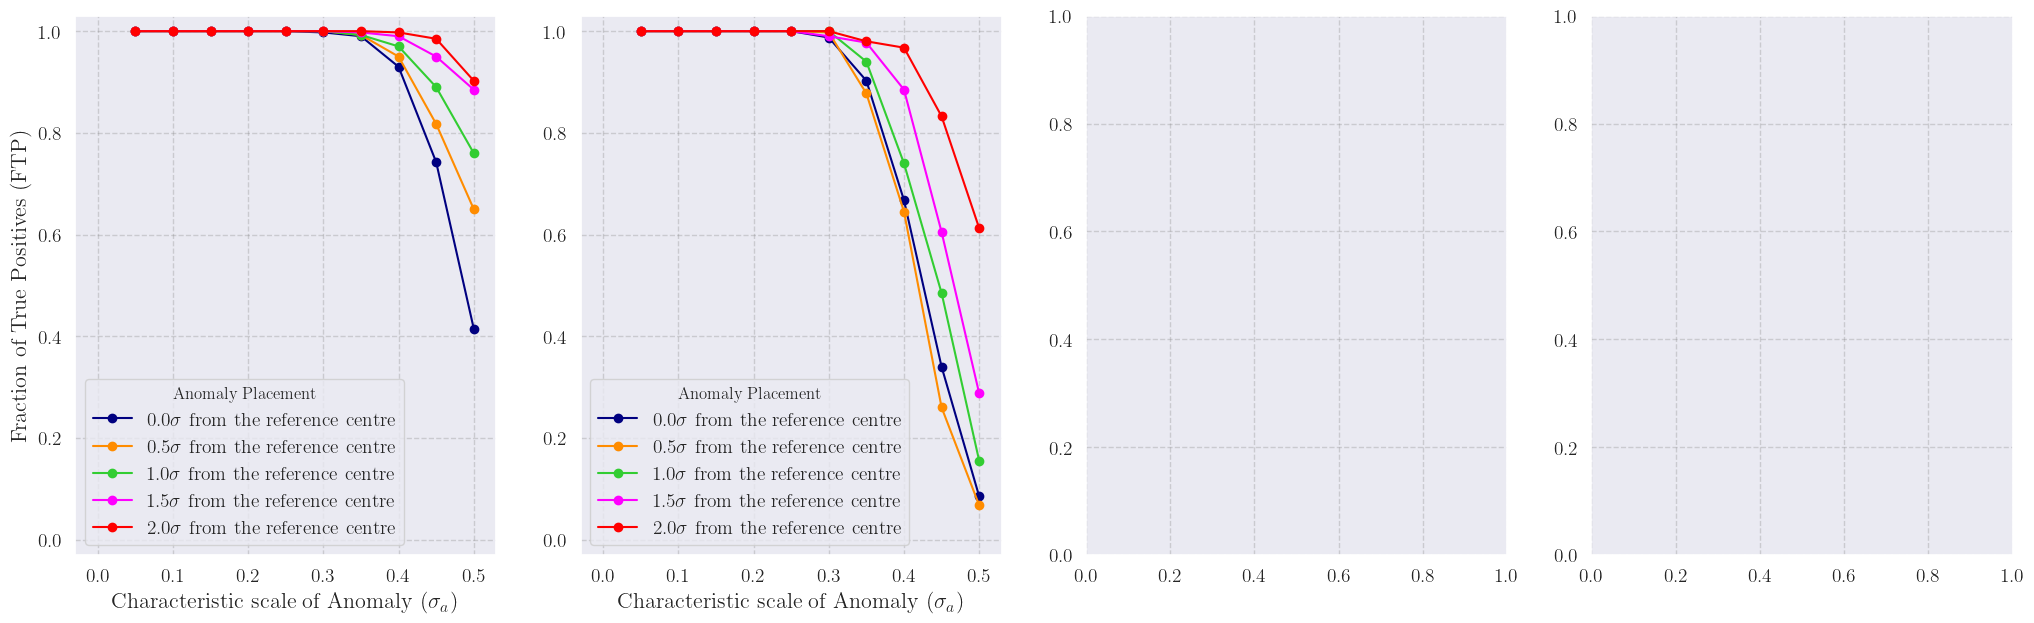

In [69]:
# Create the subplot figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(25, 7))


F5PA = F5PA.mean(axis=1)
for i, pos in enumerate(positions):
    axes[0].plot(sigma_a, F5PA[:,i], label=f'{pos:.1f}$\sigma$ from the reference centre', marker='o', color=colors[i])
axes[0].set_xlabel("Characteristic scale of Anomaly ($\sigma_a$)")
axes[0].set_ylabel("Fraction of True Positives (FTP)")
axes[0].legend(title='Anomaly Placement')
axes[0].set_ylim([-.03, 1.03])
axes[0].set_xlim([-.03, 0.53])

###

F5PB = F5PB.mean(axis=1)
for i, pos in enumerate(positions):
    axes[1].plot(sigma_a, F5PB[:, i], label=f'{pos:.1f}$\sigma$ from the reference centre', marker='o', color=colors[i])
axes[1].set_xlabel("Characteristic scale of Anomaly ($\sigma_a$)")

axes[1].legend(title='Anomaly Placement')
axes[1].set_ylim([-.03, 1.03])
axes[1].set_xlim([-.03, 0.53])

### 3.2 Fig 5, pannel C


In [72]:
sig = 1.
background_size_range = range(10000,100000+1,10000)
cstd1 = .3 
sigma_a = cstd1 



crit_val = np.quantile( NLPval_bernulli, 0.9999 ) #    11.7
num_dimensions=10

repp = 2 # number of repetitions
F5PC1 = np.zeros( ( len(background_size_range), repp) )
F5PC2 = np.zeros( ( len(background_size_range), repp) )

for ii in range(len(background_size_range)):
    dim, sizes, means, cstd2 = setup_gaussian_components(num_dimensions=num_dimensions, background_size=background_size_range[ii], shift_factors = sig)
    

    for jj in range(repp):            
            # loop over repetitions

            covariances = [np.eye(dim), cstd1**2 * np.eye(dim), cstd2 * np.eye(dim)]
            
            reference_data = np.random.multivariate_normal(np.array([0] + [0] * (dim - 1)), np.eye(dim), np.array(sizes).sum())
            
            MSG = generate_gaussian_mixture(dim, sizes, means, covariances)
            MST = generate_data_with_torus_anomalies(num_dimensions=dim, cluster_sizes=sizes, anomaly_radius=cstd1, shift_factors=sig)

            binary_sequences_anomaly_MSG, _ = From_data_to_binary.create_binary_array_cdist(
                MSG, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MSG, kstar_values_anomaly_MSG = compute_upsilon_values(
                binary_sequences_anomaly_MSG, NEIGHBOR_RANGE, NUM_CORES
            )

            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F5PC1[ii,jj] = TP
                        
            
            binary_sequences_anomaly_MST, _ = From_data_to_binary.create_binary_array_cdist(
                MST, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MST, kstar_values_anomaly_MST = compute_upsilon_values(
                binary_sequences_anomaly_MST, NEIGHBOR_RANGE, NUM_CORES
            )      
            
            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F5PC2[ii,jj] = TP     

Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 5/103
Processing partition 6/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 11/103
Processing partition 12/103
Processing partition 10/103
Processing partition 13/103
Processing partition 14/103
Processing partition 15/103
Processing partition 16/103
Processing partition 17/103
Processing partition 18/103
Processing partition 19/103
Processing partition 20/103
Processing partition 22/103
Processing partition 21/103
Processing partition 23/103
Processing partition 25/103
Processing partition 24/103
Processing partition 28/103
Processing partition 26/103
Processing partition 27/103
Processing partition 30/103
Processing partition 29/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 36/103
Processing partition 35/103
P

Processing partition 80/103
Processing partition 83/103
Processing partition 78/103
Processing partition 81/103
Processing partition 82/103
Processing partition 79/103
Processing partition 84/103
Processing partition 85/103
Processing partition 86/103
Processing partition 87/103
Processing partition 88/103
Processing partition 103/103
Processing partition 89/103
Processing partition 90/103
Processing partition 91/103
Processing partition 92/103
Processing partition 93/103
Processing partition 94/103
Processing partition 96/103
Processing partition 95/103
Processing partition 97/103
Processing partition 98/103
Processing partition 100/103
Processing partition 101/103
Processing partition 99/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processin

Processing partition 140/203
Processing partition 141/203
Processing partition 143/203
Processing partition 142/203
Processing partition 145/203
Processing partition 144/203
Processing partition 146/203
Processing partition 147/203
Processing partition 149/203
Processing partition 148/203
Processing partition 151/203
Processing partition 152/203
Processing partition 153/203
Processing partition 154/203
Processing partition 150/203
Processing partition 155/203
Processing partition 156/203
Processing partition 157/203
Processing partition 158/203
Processing partition 159/203
Processing partition 160/203
Processing partition 161/203
Processing partition 162/203
Processing partition 164/203
Processing partition 163/203
Processing partition 167/203
Processing partition 166/203
Processing partition 165/203
Processing partition 168/203
Processing partition 169/203
Processing partition 170/203
Processing partition 171/203
Processing partition 173/203
Processing partition 172/203
Processing par

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/203
Processing partition 1/203
Processing partition 3/203
Processing partition 5/203
Processing partition 4/203
Processing partition 6/203
Processing partition 7/203
Processing partition 9/203
Processing partition 8/203
Processing partition 10/203
Processing partition 11/203
Processing partition 12/203
Processing partition 14/203
Processing partition 13/203
Processing partiti

Processing partition 58/203
Processing partition 60/203
Processing partition 62/203
Processing partition 63/203
Processing partition 59/203
Processing partition 61/203
Processing partition 64/203
Processing partition 65/203
Processing partition 66/203
Processing partition 67/203
Processing partition 69/203
Processing partition 68/203
Processing partition 71/203
Processing partition 70/203
Processing partition 72/203
Processing partition 73/203
Processing partition 76/203
Processing partition 74/203
Processing partition 75/203
Processing partition 78/203
Processing partition 77/203
Processing partition 79/203
Processing partition 80/203
Processing partition 81/203
Processing partition 82/203
Processing partition 83/203
Processing partition 84/203
Processing partition 85/203
Processing partition 86/203
Processing partition 87/203
Processing partition 88/203
Processing partition 89/203
Processing partition 90/203
Processing partition 91/203
Processing partition 92/203
Processing partition

Processing partition 125/303
Processing partition 126/303
Processing partition 128/303
Processing partition 127/303
Processing partition 129/303
Processing partition 130/303
Processing partition 131/303
Processing partition 132/303
Processing partition 133/303
Processing partition 134/303
Processing partition 135/303
Processing partition 136/303
Processing partition 137/303
Processing partition 138/303
Processing partition 139/303
Processing partition 140/303
Processing partition 141/303
Processing partition 142/303
Processing partition 143/303
Processing partition 144/303
Processing partition 145/303
Processing partition 146/303
Processing partition 148/303
Processing partition 147/303
Processing partition 149/303
Processing partition 150/303
Processing partition 151/303
Processing partition 153/303
Processing partition 152/303
Processing partition 154/303
Processing partition 155/303
Processing partition 156/303
Processing partition 157/303
Processing partition 158/303
Processing par

Processing partition 97/303
Processing partition 99/303
Processing partition 98/303
Processing partition 100/303
Processing partition 101/303
Processing partition 102/303
Processing partition 103/303
Processing partition 104/303
Processing partition 105/303
Processing partition 106/303
Processing partition 107/303
Processing partition 109/303
Processing partition 110/303
Processing partition 108/303
Processing partition 111/303
Processing partition 112/303
Processing partition 113/303
Processing partition 114/303
Processing partition 115/303
Processing partition 116/303
Processing partition 118/303
Processing partition 117/303
Processing partition 119/303
Processing partition 120/303
Processing partition 121/303
Processing partition 122/303
Processing partition 123/303
Processing partition 124/303
Processing partition 126/303
Processing partition 125/303
Processing partition 127/303
Processing partition 128/303
Processing partition 129/303
Processing partition 130/303
Processing partit

Processing partition 64/303
Processing partition 65/303
Processing partition 66/303
Processing partition 67/303
Processing partition 68/303
Processing partition 69/303
Processing partition 70/303
Processing partition 71/303
Processing partition 72/303
Processing partition 73/303
Processing partition 74/303
Processing partition 75/303
Processing partition 76/303
Processing partition 78/303
Processing partition 79/303
Processing partition 77/303
Processing partition 81/303
Processing partition 80/303
Processing partition 82/303
Processing partition 83/303
Processing partition 84/303
Processing partition 85/303
Processing partition 86/303
Processing partition 87/303
Processing partition 88/303
Processing partition 89/303
Processing partition 91/303
Processing partition 90/303
Processing partition 92/303
Processing partition 94/303
Processing partition 93/303
Processing partition 95/303
Processing partition 96/303
Processing partition 98/303
Processing partition 97/303
Processing partition

Processing partition 33/303
Processing partition 34/303
Processing partition 35/303
Processing partition 36/303
Processing partition 37/303
Processing partition 38/303
Processing partition 39/303
Processing partition 40/303
Processing partition 41/303
Processing partition 44/303
Processing partition 42/303
Processing partition 43/303
Processing partition 45/303
Processing partition 46/303
Processing partition 47/303
Processing partition 48/303
Processing partition 49/303
Processing partition 50/303
Processing partition 51/303
Processing partition 52/303
Processing partition 53/303
Processing partition 54/303
Processing partition 55/303
Processing partition 56/303
Processing partition 57/303
Processing partition 58/303
Processing partition 59/303
Processing partition 60/303
Processing partition 61/303
Processing partition 62/303
Processing partition 63/303
Processing partition 64/303
Processing partition 65/303
Processing partition 66/303
Processing partition 68/303
Processing partition

Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/403
Processing partition 2/403
Processing partition 4/403
Processing partition 3/403
Processing partition 6/403
Processing partition 5/403
Processing partition 7/403
Processing partition 8/403
Processing partition 11/403
Processing partition 9/403
Processing partition 10/403
Processing partition 12/403
Processing partition 14/403
Processing partition 15/403
Processing partition 13/403
Processing partition 16/403
Processing partition 17/403
Processing partition 18/403
Processing partition 19/403
Processing partition 20/403
Processing partition 21/403
Processing partition 23/403
Processing partition 22/403
Processing partition 24/403
Processing partition 25/403
Processing partition 26/403
Processing partition 27/403
Processing partition 28/403
Processing partition 29/403
Processing partition 30/403
Processing partition 31/403
Processing partition 32/403

Processing partition 286/403
Processing partition 285/403
Processing partition 287/403
Processing partition 288/403
Processing partition 289/403
Processing partition 290/403
Processing partition 291/403
Processing partition 292/403
Processing partition 293/403
Processing partition 294/403
Processing partition 295/403
Processing partition 296/403
Processing partition 297/403
Processing partition 298/403
Processing partition 299/403
Processing partition 300/403
Processing partition 301/403
Processing partition 302/403
Processing partition 303/403
Processing partition 305/403
Processing partition 306/403
Processing partition 304/403
Processing partition 308/403
Processing partition 307/403
Processing partition 309/403
Processing partition 310/403
Processing partition 311/403
Processing partition 312/403
Processing partition 313/403
Processing partition 315/403
Processing partition 314/403
Processing partition 317/403
Processing partition 316/403
Processing partition 318/403
Processing par

Processing partition 148/403
Processing partition 149/403
Processing partition 150/403
Processing partition 151/403
Processing partition 152/403
Processing partition 153/403
Processing partition 155/403
Processing partition 156/403
Processing partition 154/403
Processing partition 158/403
Processing partition 159/403
Processing partition 160/403
Processing partition 157/403
Processing partition 161/403
Processing partition 162/403
Processing partition 163/403
Processing partition 164/403
Processing partition 165/403
Processing partition 166/403
Processing partition 167/403
Processing partition 169/403
Processing partition 168/403
Processing partition 170/403
Processing partition 171/403
Processing partition 173/403
Processing partition 172/403
Processing partition 174/403
Processing partition 175/403
Processing partition 176/403
Processing partition 177/403
Processing partition 178/403
Processing partition 179/403
Processing partition 180/403
Processing partition 181/403
Processing par

Processing partition 12/403
Processing partition 13/403
Processing partition 14/403
Processing partition 15/403
Processing partition 16/403
Processing partition 17/403
Processing partition 18/403
Processing partition 19/403
Processing partition 20/403
Processing partition 21/403
Processing partition 22/403
Processing partition 23/403
Processing partition 24/403
Processing partition 25/403
Processing partition 27/403
Processing partition 28/403
Processing partition 26/403
Processing partition 29/403
Processing partition 30/403
Processing partition 31/403
Processing partition 32/403
Processing partition 33/403
Processing partition 34/403
Processing partition 35/403
Processing partition 36/403
Processing partition 38/403
Processing partition 37/403
Processing partition 39/403
Processing partition 40/403
Processing partition 41/403
Processing partition 42/403
Processing partition 43/403
Processing partition 44/403
Processing partition 45/403
Processing partition 46/403
Processing partition

Processing partition 305/403
Processing partition 302/403
Processing partition 307/403
Processing partition 306/403
Processing partition 308/403
Processing partition 309/403
Processing partition 310/403
Processing partition 311/403
Processing partition 313/403
Processing partition 312/403
Processing partition 314/403
Processing partition 315/403
Processing partition 316/403
Processing partition 317/403
Processing partition 319/403
Processing partition 318/403
Processing partition 320/403
Processing partition 321/403
Processing partition 322/403
Processing partition 323/403
Processing partition 324/403
Processing partition 325/403
Processing partition 326/403
Processing partition 327/403
Processing partition 328/403
Processing partition 329/403
Processing partition 330/403
Processing partition 331/403
Processing partition 332/403
Processing partition 333/403
Processing partition 334/403
Processing partition 335/403
Processing partition 336/403
Processing partition 337/403
Processing par

Processing partition 176/403
Processing partition 177/403
Processing partition 178/403
Processing partition 179/403
Processing partition 180/403
Processing partition 181/403
Processing partition 182/403
Processing partition 183/403
Processing partition 184/403
Processing partition 185/403
Processing partition 186/403
Processing partition 187/403
Processing partition 189/403
Processing partition 190/403
Processing partition 188/403
Processing partition 191/403
Processing partition 192/403
Processing partition 193/403
Processing partition 195/403
Processing partition 194/403
Processing partition 196/403
Processing partition 197/403
Processing partition 198/403
Processing partition 199/403
Processing partition 200/403
Processing partition 201/403
Processing partition 202/403
Processing partition 203/403
Processing partition 204/403
Processing partition 207/403
Processing partition 205/403
Processing partition 208/403
Processing partition 206/403
Processing partition 209/403
Processing par

Processing partition 39/503
Processing partition 40/503
Processing partition 41/503
Processing partition 44/503
Processing partition 42/503
Processing partition 45/503
Processing partition 47/503
Processing partition 46/503
Processing partition 43/503
Processing partition 48/503
Processing partition 49/503
Processing partition 50/503
Processing partition 53/503
Processing partition 52/503
Processing partition 54/503
Processing partition 56/503
Processing partition 55/503
Processing partition 51/503
Processing partition 57/503
Processing partition 58/503
Processing partition 60/503
Processing partition 59/503
Processing partition 61/503
Processing partition 63/503
Processing partition 62/503
Processing partition 64/503
Processing partition 65/503
Processing partition 66/503
Processing partition 67/503
Processing partition 68/503
Processing partition 69/503
Processing partition 70/503
Processing partition 71/503
Processing partition 73/503
Processing partition 74/503
Processing partition

Processing partition 325/503
Processing partition 326/503
Processing partition 327/503
Processing partition 328/503
Processing partition 329/503
Processing partition 330/503
Processing partition 331/503
Processing partition 332/503
Processing partition 334/503
Processing partition 335/503
Processing partition 333/503
Processing partition 337/503
Processing partition 336/503
Processing partition 338/503
Processing partition 339/503
Processing partition 340/503
Processing partition 341/503
Processing partition 342/503
Processing partition 343/503
Processing partition 345/503
Processing partition 344/503
Processing partition 346/503
Processing partition 347/503
Processing partition 348/503
Processing partition 351/503
Processing partition 350/503
Processing partition 349/503
Processing partition 352/503
Processing partition 353/503
Processing partition 354/503
Processing partition 355/503
Processing partition 357/503
Processing partition 356/503
Processing partition 358/503
Processing par

Processing partition 90/503
Processing partition 91/503
Processing partition 93/503
Processing partition 94/503
Processing partition 95/503
Processing partition 92/503
Processing partition 96/503
Processing partition 97/503
Processing partition 98/503
Processing partition 99/503
Processing partition 100/503
Processing partition 102/503
Processing partition 101/503
Processing partition 103/503
Processing partition 104/503
Processing partition 105/503
Processing partition 106/503
Processing partition 107/503
Processing partition 108/503
Processing partition 109/503
Processing partition 110/503
Processing partition 111/503
Processing partition 112/503
Processing partition 113/503
Processing partition 114/503
Processing partition 115/503
Processing partition 118/503
Processing partition 116/503
Processing partition 117/503
Processing partition 119/503
Processing partition 120/503
Processing partition 122/503
Processing partition 121/503
Processing partition 123/503
Processing partition 124

Processing partition 372/503
Processing partition 377/503
Processing partition 375/503
Processing partition 376/503
Processing partition 378/503
Processing partition 379/503
Processing partition 380/503
Processing partition 381/503
Processing partition 382/503
Processing partition 383/503
Processing partition 385/503
Processing partition 384/503
Processing partition 386/503
Processing partition 387/503
Processing partition 388/503
Processing partition 389/503
Processing partition 392/503
Processing partition 390/503
Processing partition 393/503
Processing partition 391/503
Processing partition 394/503
Processing partition 396/503
Processing partition 395/503
Processing partition 397/503
Processing partition 398/503
Processing partition 399/503
Processing partition 400/503
Processing partition 401/503
Processing partition 402/503
Processing partition 403/503
Processing partition 404/503
Processing partition 405/503
Processing partition 406/503
Processing partition 407/503
Processing par

Processing partition 137/503
Processing partition 139/503
Processing partition 138/503
Processing partition 140/503
Processing partition 141/503
Processing partition 143/503
Processing partition 144/503
Processing partition 142/503
Processing partition 145/503
Processing partition 146/503
Processing partition 147/503
Processing partition 149/503
Processing partition 148/503
Processing partition 150/503
Processing partition 151/503
Processing partition 152/503
Processing partition 153/503
Processing partition 154/503
Processing partition 156/503
Processing partition 155/503
Processing partition 157/503
Processing partition 159/503
Processing partition 160/503
Processing partition 161/503
Processing partition 158/503
Processing partition 162/503
Processing partition 163/503
Processing partition 164/503
Processing partition 165/503
Processing partition 167/503
Processing partition 166/503
Processing partition 169/503
Processing partition 168/503
Processing partition 170/503
Processing par

Processing partition 423/503
Processing partition 425/503
Processing partition 424/503
Processing partition 426/503
Processing partition 427/503
Processing partition 428/503
Processing partition 429/503
Processing partition 430/503
Processing partition 431/503
Processing partition 432/503
Processing partition 434/503
Processing partition 433/503
Processing partition 437/503
Processing partition 436/503
Processing partition 435/503
Processing partition 438/503
Processing partition 439/503
Processing partition 440/503
Processing partition 442/503
Processing partition 443/503
Processing partition 444/503
Processing partition 445/503
Processing partition 441/503
Processing partition 446/503
Processing partition 448/503
Processing partition 447/503
Processing partition 449/503
Processing partition 450/503
Processing partition 451/503
Processing partition 452/503
Processing partition 453/503
Processing partition 454/503
Processing partition 455/503
Processing partition 456/503
Processing par

Processing partition 192/503
Processing partition 193/503
Processing partition 194/503
Processing partition 195/503
Processing partition 196/503
Processing partition 197/503
Processing partition 198/503
Processing partition 199/503
Processing partition 201/503
Processing partition 200/503
Processing partition 202/503
Processing partition 204/503
Processing partition 207/503
Processing partition 203/503
Processing partition 205/503
Processing partition 206/503
Processing partition 208/503
Processing partition 209/503
Processing partition 210/503
Processing partition 211/503
Processing partition 212/503
Processing partition 213/503
Processing partition 214/503
Processing partition 215/503
Processing partition 216/503
Processing partition 217/503
Processing partition 218/503
Processing partition 219/503
Processing partition 220/503
Processing partition 221/503
Processing partition 222/503
Processing partition 223/503
Processing partition 224/503
Processing partition 225/503
Processing par

Processing partition 476/503
Processing partition 477/503
Processing partition 478/503
Processing partition 479/503
Processing partition 481/503
Processing partition 480/503
Processing partition 482/503
Processing partition 483/503
Processing partition 484/503
Processing partition 485/503
Processing partition 486/503
Processing partition 487/503
Processing partition 488/503
Processing partition 503/503
Processing partition 489/503
Processing partition 490/503
Processing partition 491/503
Processing partition 493/503
Processing partition 492/503
Processing partition 494/503
Processing partition 495/503
Processing partition 496/503
Processing partition 498/503
Processing partition 497/503
Processing partition 499/503
Processing partition 500/503
Processing partition 501/503
Processing partition 502/503
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Pro

Processing partition 242/603
Processing partition 243/603
Processing partition 244/603
Processing partition 245/603
Processing partition 247/603
Processing partition 246/603
Processing partition 248/603
Processing partition 249/603
Processing partition 250/603
Processing partition 251/603
Processing partition 252/603
Processing partition 254/603
Processing partition 253/603
Processing partition 256/603
Processing partition 255/603
Processing partition 257/603
Processing partition 259/603
Processing partition 260/603
Processing partition 258/603
Processing partition 261/603
Processing partition 262/603
Processing partition 264/603
Processing partition 263/603
Processing partition 265/603
Processing partition 267/603
Processing partition 266/603
Processing partition 268/603
Processing partition 270/603
Processing partition 271/603
Processing partition 269/603
Processing partition 272/603
Processing partition 273/603
Processing partition 274/603
Processing partition 275/603
Processing par

Processing partition 530/603
Processing partition 531/603
Processing partition 533/603
Processing partition 534/603
Processing partition 532/603
Processing partition 535/603
Processing partition 536/603
Processing partition 537/603
Processing partition 538/603
Processing partition 539/603
Processing partition 540/603
Processing partition 542/603
Processing partition 541/603
Processing partition 543/603
Processing partition 544/603
Processing partition 545/603
Processing partition 546/603
Processing partition 547/603
Processing partition 548/603
Processing partition 549/603
Processing partition 550/603
Processing partition 552/603
Processing partition 551/603
Processing partition 554/603
Processing partition 553/603
Processing partition 555/603
Processing partition 556/603
Processing partition 557/603
Processing partition 558/603
Processing partition 560/603
Processing partition 559/603
Processing partition 562/603
Processing partition 561/603
Processing partition 563/603
Processing par

Processing partition 196/603
Processing partition 197/603
Processing partition 198/603
Processing partition 199/603
Processing partition 200/603
Processing partition 201/603
Processing partition 202/603
Processing partition 203/603
Processing partition 205/603
Processing partition 206/603
Processing partition 207/603
Processing partition 204/603
Processing partition 208/603
Processing partition 209/603
Processing partition 210/603
Processing partition 211/603
Processing partition 212/603
Processing partition 213/603
Processing partition 214/603
Processing partition 215/603
Processing partition 216/603
Processing partition 218/603
Processing partition 217/603
Processing partition 219/603
Processing partition 220/603
Processing partition 221/603
Processing partition 223/603
Processing partition 224/603
Processing partition 222/603
Processing partition 225/603
Processing partition 226/603
Processing partition 227/603
Processing partition 229/603
Processing partition 228/603
Processing par

Processing partition 487/603
Processing partition 488/603
Processing partition 489/603
Processing partition 490/603
Processing partition 491/603
Processing partition 493/603
Processing partition 492/603
Processing partition 495/603
Processing partition 494/603
Processing partition 496/603
Processing partition 497/603
Processing partition 498/603
Processing partition 499/603
Processing partition 501/603
Processing partition 500/603
Processing partition 502/603
Processing partition 504/603
Processing partition 503/603
Processing partition 505/603
Processing partition 507/603
Processing partition 508/603
Processing partition 506/603
Processing partition 509/603
Processing partition 510/603
Processing partition 511/603
Processing partition 512/603
Processing partition 514/603
Processing partition 513/603
Processing partition 515/603
Processing partition 516/603
Processing partition 518/603
Processing partition 517/603
Processing partition 519/603
Processing partition 521/603
Processing par

Processing partition 156/603
Processing partition 157/603
Processing partition 158/603
Processing partition 155/603
Processing partition 159/603
Processing partition 160/603
Processing partition 161/603
Processing partition 163/603
Processing partition 162/603
Processing partition 164/603
Processing partition 166/603
Processing partition 165/603
Processing partition 168/603
Processing partition 169/603
Processing partition 167/603
Processing partition 170/603
Processing partition 171/603
Processing partition 172/603
Processing partition 173/603
Processing partition 175/603
Processing partition 174/603
Processing partition 176/603
Processing partition 177/603
Processing partition 178/603
Processing partition 179/603
Processing partition 180/603
Processing partition 182/603
Processing partition 181/603
Processing partition 183/603
Processing partition 186/603
Processing partition 184/603
Processing partition 187/603
Processing partition 185/603
Processing partition 188/603
Processing par

Processing partition 439/603
Processing partition 440/603
Processing partition 441/603
Processing partition 442/603
Processing partition 443/603
Processing partition 444/603
Processing partition 446/603
Processing partition 445/603
Processing partition 447/603
Processing partition 448/603
Processing partition 450/603
Processing partition 449/603
Processing partition 451/603
Processing partition 452/603
Processing partition 454/603
Processing partition 453/603
Processing partition 455/603
Processing partition 456/603
Processing partition 457/603
Processing partition 458/603
Processing partition 459/603
Processing partition 460/603
Processing partition 461/603
Processing partition 462/603
Processing partition 463/603
Processing partition 464/603
Processing partition 465/603
Processing partition 466/603
Processing partition 467/603
Processing partition 468/603
Processing partition 469/603
Processing partition 470/603
Processing partition 471/603
Processing partition 472/603
Processing par

Processing partition 104/603
Processing partition 105/603
Processing partition 107/603
Processing partition 108/603
Processing partition 109/603
Processing partition 106/603
Processing partition 111/603
Processing partition 110/603
Processing partition 112/603
Processing partition 113/603
Processing partition 115/603
Processing partition 114/603
Processing partition 117/603
Processing partition 116/603
Processing partition 119/603
Processing partition 118/603
Processing partition 120/603
Processing partition 121/603
Processing partition 122/603
Processing partition 124/603
Processing partition 123/603
Processing partition 126/603
Processing partition 127/603
Processing partition 125/603
Processing partition 128/603
Processing partition 129/603
Processing partition 130/603
Processing partition 132/603
Processing partition 131/603
Processing partition 133/603
Processing partition 135/603
Processing partition 136/603
Processing partition 134/603
Processing partition 138/603
Processing par

Processing partition 388/603
Processing partition 389/603
Processing partition 391/603
Processing partition 393/603
Processing partition 392/603
Processing partition 390/603
Processing partition 394/603
Processing partition 395/603
Processing partition 396/603
Processing partition 397/603
Processing partition 398/603
Processing partition 399/603
Processing partition 400/603
Processing partition 401/603
Processing partition 402/603
Processing partition 403/603
Processing partition 404/603
Processing partition 406/603
Processing partition 405/603
Processing partition 408/603
Processing partition 407/603
Processing partition 409/603
Processing partition 410/603
Processing partition 411/603
Processing partition 412/603
Processing partition 413/603
Processing partition 414/603
Processing partition 415/603
Processing partition 416/603
Processing partition 417/603
Processing partition 419/603
Processing partition 418/603
Processing partition 420/603
Processing partition 421/603
Processing par

Processing partition 49/703
Processing partition 51/703
Processing partition 52/703
Processing partition 50/703
Processing partition 53/703
Processing partition 54/703
Processing partition 55/703
Processing partition 58/703
Processing partition 57/703
Processing partition 56/703
Processing partition 59/703
Processing partition 60/703
Processing partition 62/703
Processing partition 61/703
Processing partition 64/703
Processing partition 63/703
Processing partition 65/703
Processing partition 66/703
Processing partition 67/703
Processing partition 68/703
Processing partition 69/703
Processing partition 70/703
Processing partition 71/703
Processing partition 72/703
Processing partition 73/703
Processing partition 74/703
Processing partition 75/703
Processing partition 77/703
Processing partition 76/703
Processing partition 78/703
Processing partition 79/703
Processing partition 80/703
Processing partition 81/703
Processing partition 82/703
Processing partition 85/703
Processing partition

Processing partition 336/703
Processing partition 337/703
Processing partition 338/703
Processing partition 339/703
Processing partition 340/703
Processing partition 341/703
Processing partition 342/703
Processing partition 343/703
Processing partition 344/703
Processing partition 346/703
Processing partition 345/703
Processing partition 347/703
Processing partition 348/703
Processing partition 350/703
Processing partition 351/703
Processing partition 352/703
Processing partition 349/703
Processing partition 353/703
Processing partition 354/703
Processing partition 355/703
Processing partition 356/703
Processing partition 357/703
Processing partition 360/703
Processing partition 358/703
Processing partition 359/703
Processing partition 361/703
Processing partition 364/703
Processing partition 362/703
Processing partition 365/703
Processing partition 363/703
Processing partition 367/703
Processing partition 368/703
Processing partition 366/703
Processing partition 369/703
Processing par

Processing partition 621/703
Processing partition 620/703
Processing partition 622/703
Processing partition 623/703
Processing partition 624/703
Processing partition 625/703
Processing partition 626/703
Processing partition 627/703
Processing partition 628/703
Processing partition 631/703
Processing partition 629/703
Processing partition 630/703
Processing partition 632/703
Processing partition 634/703
Processing partition 633/703
Processing partition 635/703
Processing partition 636/703
Processing partition 637/703
Processing partition 638/703
Processing partition 639/703
Processing partition 640/703
Processing partition 641/703
Processing partition 642/703
Processing partition 643/703
Processing partition 644/703
Processing partition 645/703
Processing partition 646/703
Processing partition 647/703
Processing partition 648/703
Processing partition 650/703
Processing partition 649/703
Processing partition 651/703
Processing partition 653/703
Processing partition 654/703
Processing par

Processing partition 188/703
Processing partition 189/703
Processing partition 190/703
Processing partition 192/703
Processing partition 191/703
Processing partition 193/703
Processing partition 194/703
Processing partition 195/703
Processing partition 197/703
Processing partition 198/703
Processing partition 196/703
Processing partition 199/703
Processing partition 203/703
Processing partition 201/703
Processing partition 202/703
Processing partition 200/703
Processing partition 204/703
Processing partition 205/703
Processing partition 206/703
Processing partition 207/703
Processing partition 208/703
Processing partition 209/703
Processing partition 210/703
Processing partition 211/703
Processing partition 212/703
Processing partition 213/703
Processing partition 214/703
Processing partition 215/703
Processing partition 216/703
Processing partition 219/703
Processing partition 217/703
Processing partition 218/703
Processing partition 220/703
Processing partition 221/703
Processing par

Processing partition 474/703
Processing partition 475/703
Processing partition 476/703
Processing partition 477/703
Processing partition 478/703
Processing partition 480/703
Processing partition 479/703
Processing partition 481/703
Processing partition 483/703
Processing partition 482/703
Processing partition 484/703
Processing partition 485/703
Processing partition 486/703
Processing partition 487/703
Processing partition 488/703
Processing partition 489/703
Processing partition 490/703
Processing partition 491/703
Processing partition 493/703
Processing partition 492/703
Processing partition 494/703
Processing partition 495/703
Processing partition 496/703
Processing partition 498/703
Processing partition 499/703
Processing partition 497/703
Processing partition 500/703
Processing partition 501/703
Processing partition 502/703
Processing partition 503/703
Processing partition 504/703
Processing partition 506/703
Processing partition 505/703
Processing partition 507/703
Processing par

Processing partition 41/703
Processing partition 40/703
Processing partition 43/703
Processing partition 44/703
Processing partition 45/703
Processing partition 42/703
Processing partition 46/703
Processing partition 48/703
Processing partition 47/703
Processing partition 49/703
Processing partition 50/703
Processing partition 51/703
Processing partition 52/703
Processing partition 53/703
Processing partition 55/703
Processing partition 54/703
Processing partition 56/703
Processing partition 58/703
Processing partition 59/703
Processing partition 57/703
Processing partition 61/703
Processing partition 60/703
Processing partition 62/703
Processing partition 63/703
Processing partition 64/703
Processing partition 65/703
Processing partition 66/703
Processing partition 67/703
Processing partition 68/703
Processing partition 69/703
Processing partition 70/703
Processing partition 72/703
Processing partition 73/703
Processing partition 71/703
Processing partition 74/703
Processing partition

Processing partition 326/703
Processing partition 325/703
Processing partition 327/703
Processing partition 328/703
Processing partition 329/703
Processing partition 330/703
Processing partition 331/703
Processing partition 333/703
Processing partition 332/703
Processing partition 334/703
Processing partition 335/703
Processing partition 336/703
Processing partition 337/703
Processing partition 338/703
Processing partition 339/703
Processing partition 340/703
Processing partition 341/703
Processing partition 342/703
Processing partition 343/703
Processing partition 344/703
Processing partition 345/703
Processing partition 346/703
Processing partition 347/703
Processing partition 348/703
Processing partition 349/703
Processing partition 351/703
Processing partition 352/703
Processing partition 350/703
Processing partition 353/703
Processing partition 354/703
Processing partition 355/703
Processing partition 356/703
Processing partition 358/703
Processing partition 357/703
Processing par

Processing partition 609/703
Processing partition 610/703
Processing partition 612/703
Processing partition 611/703
Processing partition 613/703
Processing partition 615/703
Processing partition 616/703
Processing partition 617/703
Processing partition 614/703
Processing partition 619/703
Processing partition 618/703
Processing partition 620/703
Processing partition 621/703
Processing partition 622/703
Processing partition 623/703
Processing partition 624/703
Processing partition 625/703
Processing partition 626/703
Processing partition 627/703
Processing partition 628/703
Processing partition 629/703
Processing partition 630/703
Processing partition 631/703
Processing partition 632/703
Processing partition 633/703
Processing partition 634/703
Processing partition 635/703
Processing partition 636/703
Processing partition 637/703
Processing partition 639/703
Processing partition 638/703
Processing partition 640/703
Processing partition 643/703
Processing partition 641/703
Processing par

Processing partition 177/703
Processing partition 178/703
Processing partition 179/703
Processing partition 180/703
Processing partition 181/703
Processing partition 182/703
Processing partition 184/703
Processing partition 183/703
Processing partition 186/703
Processing partition 185/703
Processing partition 187/703
Processing partition 189/703
Processing partition 188/703
Processing partition 191/703
Processing partition 190/703
Processing partition 192/703
Processing partition 193/703
Processing partition 194/703
Processing partition 195/703
Processing partition 196/703
Processing partition 197/703
Processing partition 200/703
Processing partition 198/703
Processing partition 199/703
Processing partition 202/703
Processing partition 201/703
Processing partition 203/703
Processing partition 205/703
Processing partition 204/703
Processing partition 206/703
Processing partition 207/703
Processing partition 208/703
Processing partition 209/703
Processing partition 210/703
Processing par

Processing partition 463/703
Processing partition 464/703
Processing partition 465/703
Processing partition 462/703
Processing partition 466/703
Processing partition 467/703
Processing partition 468/703
Processing partition 469/703
Processing partition 470/703
Processing partition 471/703
Processing partition 473/703
Processing partition 472/703
Processing partition 474/703
Processing partition 475/703
Processing partition 477/703
Processing partition 476/703
Processing partition 478/703
Processing partition 480/703
Processing partition 479/703
Processing partition 481/703
Processing partition 483/703
Processing partition 482/703
Processing partition 484/703
Processing partition 485/703
Processing partition 486/703
Processing partition 487/703
Processing partition 489/703
Processing partition 488/703
Processing partition 490/703
Processing partition 491/703
Processing partition 492/703
Processing partition 493/703
Processing partition 494/703
Processing partition 495/703
Processing par

Processing partition 26/803
Processing partition 27/803
Processing partition 28/803
Processing partition 30/803
Processing partition 29/803
Processing partition 32/803
Processing partition 31/803
Processing partition 34/803
Processing partition 33/803
Processing partition 35/803
Processing partition 36/803
Processing partition 37/803
Processing partition 38/803
Processing partition 39/803
Processing partition 40/803
Processing partition 41/803
Processing partition 43/803
Processing partition 44/803
Processing partition 42/803
Processing partition 45/803
Processing partition 47/803
Processing partition 46/803
Processing partition 48/803
Processing partition 49/803
Processing partition 50/803
Processing partition 52/803
Processing partition 51/803
Processing partition 53/803
Processing partition 55/803
Processing partition 54/803
Processing partition 56/803
Processing partition 57/803
Processing partition 58/803
Processing partition 59/803
Processing partition 61/803
Processing partition

Processing partition 313/803
Processing partition 315/803
Processing partition 314/803
Processing partition 317/803
Processing partition 316/803
Processing partition 318/803
Processing partition 319/803
Processing partition 320/803
Processing partition 321/803
Processing partition 322/803
Processing partition 324/803
Processing partition 323/803
Processing partition 325/803
Processing partition 326/803
Processing partition 327/803
Processing partition 328/803
Processing partition 329/803
Processing partition 331/803
Processing partition 332/803
Processing partition 330/803
Processing partition 334/803
Processing partition 333/803
Processing partition 335/803
Processing partition 336/803
Processing partition 337/803
Processing partition 338/803
Processing partition 339/803
Processing partition 340/803
Processing partition 341/803
Processing partition 343/803
Processing partition 342/803
Processing partition 344/803
Processing partition 345/803
Processing partition 346/803
Processing par

Processing partition 596/803
Processing partition 597/803
Processing partition 598/803
Processing partition 599/803
Processing partition 600/803
Processing partition 601/803
Processing partition 602/803
Processing partition 603/803
Processing partition 604/803
Processing partition 605/803
Processing partition 607/803
Processing partition 606/803
Processing partition 608/803
Processing partition 610/803
Processing partition 611/803
Processing partition 609/803
Processing partition 612/803
Processing partition 613/803
Processing partition 614/803
Processing partition 615/803
Processing partition 616/803
Processing partition 618/803
Processing partition 617/803
Processing partition 620/803
Processing partition 619/803
Processing partition 621/803
Processing partition 622/803
Processing partition 623/803
Processing partition 624/803
Processing partition 626/803
Processing partition 625/803
Processing partition 627/803
Processing partition 629/803
Processing partition 628/803
Processing par

Processing partition 60/803
Processing partition 61/803
Processing partition 63/803
Processing partition 62/803
Processing partition 64/803
Processing partition 67/803
Processing partition 65/803
Processing partition 66/803
Processing partition 72/803
Processing partition 68/803
Processing partition 69/803
Processing partition 70/803
Processing partition 71/803
Processing partition 73/803
Processing partition 75/803
Processing partition 76/803
Processing partition 74/803
Processing partition 79/803
Processing partition 77/803
Processing partition 80/803
Processing partition 78/803
Processing partition 81/803
Processing partition 84/803
Processing partition 82/803
Processing partition 83/803
Processing partition 86/803
Processing partition 87/803
Processing partition 88/803
Processing partition 85/803
Processing partition 89/803
Processing partition 90/803
Processing partition 93/803
Processing partition 91/803
Processing partition 92/803
Processing partition 95/803
Processing partition

Processing partition 344/803
Processing partition 345/803
Processing partition 347/803
Processing partition 348/803
Processing partition 349/803
Processing partition 346/803
Processing partition 350/803
Processing partition 351/803
Processing partition 352/803
Processing partition 353/803
Processing partition 355/803
Processing partition 354/803
Processing partition 356/803
Processing partition 357/803
Processing partition 358/803
Processing partition 359/803
Processing partition 360/803
Processing partition 361/803
Processing partition 362/803
Processing partition 364/803
Processing partition 363/803
Processing partition 366/803
Processing partition 367/803
Processing partition 365/803
Processing partition 368/803
Processing partition 369/803
Processing partition 370/803
Processing partition 371/803
Processing partition 372/803
Processing partition 373/803
Processing partition 374/803
Processing partition 376/803
Processing partition 377/803
Processing partition 375/803
Processing par

Processing partition 629/803
Processing partition 628/803
Processing partition 627/803
Processing partition 630/803
Processing partition 631/803
Processing partition 632/803
Processing partition 633/803
Processing partition 634/803
Processing partition 635/803
Processing partition 636/803
Processing partition 637/803
Processing partition 638/803
Processing partition 639/803
Processing partition 640/803
Processing partition 641/803
Processing partition 642/803
Processing partition 643/803
Processing partition 644/803
Processing partition 645/803
Processing partition 646/803
Processing partition 649/803
Processing partition 648/803
Processing partition 647/803
Processing partition 650/803
Processing partition 651/803
Processing partition 652/803
Processing partition 654/803
Processing partition 653/803
Processing partition 656/803
Processing partition 655/803
Processing partition 657/803
Processing partition 658/803
Processing partition 660/803
Processing partition 659/803
Processing par

Processing partition 92/803
Processing partition 94/803
Processing partition 91/803
Processing partition 95/803
Processing partition 93/803
Processing partition 96/803
Processing partition 97/803
Processing partition 98/803
Processing partition 99/803
Processing partition 100/803
Processing partition 101/803
Processing partition 102/803
Processing partition 103/803
Processing partition 104/803
Processing partition 105/803
Processing partition 106/803
Processing partition 107/803
Processing partition 108/803
Processing partition 111/803
Processing partition 110/803
Processing partition 109/803
Processing partition 112/803
Processing partition 113/803
Processing partition 114/803
Processing partition 116/803
Processing partition 115/803
Processing partition 117/803
Processing partition 120/803
Processing partition 119/803
Processing partition 122/803
Processing partition 121/803
Processing partition 118/803
Processing partition 123/803
Processing partition 124/803
Processing partition 12

Processing partition 376/803
Processing partition 377/803
Processing partition 379/803
Processing partition 378/803
Processing partition 381/803
Processing partition 382/803
Processing partition 380/803
Processing partition 383/803
Processing partition 384/803
Processing partition 385/803
Processing partition 386/803
Processing partition 387/803
Processing partition 388/803
Processing partition 390/803
Processing partition 389/803
Processing partition 391/803
Processing partition 392/803
Processing partition 393/803
Processing partition 394/803
Processing partition 395/803
Processing partition 396/803
Processing partition 398/803
Processing partition 397/803
Processing partition 399/803
Processing partition 401/803
Processing partition 400/803
Processing partition 402/803
Processing partition 403/803
Processing partition 405/803
Processing partition 404/803
Processing partition 406/803
Processing partition 408/803
Processing partition 407/803
Processing partition 410/803
Processing par

Processing partition 661/803
Processing partition 660/803
Processing partition 662/803
Processing partition 663/803
Processing partition 665/803
Processing partition 666/803
Processing partition 664/803
Processing partition 667/803
Processing partition 668/803
Processing partition 669/803
Processing partition 670/803
Processing partition 671/803
Processing partition 672/803
Processing partition 673/803
Processing partition 674/803
Processing partition 675/803
Processing partition 676/803
Processing partition 677/803
Processing partition 678/803
Processing partition 679/803
Processing partition 682/803
Processing partition 680/803
Processing partition 681/803
Processing partition 683/803
Processing partition 685/803
Processing partition 684/803
Processing partition 686/803
Processing partition 687/803
Processing partition 688/803
Processing partition 689/803
Processing partition 692/803
Processing partition 690/803
Processing partition 693/803
Processing partition 691/803
Processing par

Processing partition 127/803
Processing partition 128/803
Processing partition 129/803
Processing partition 130/803
Processing partition 131/803
Processing partition 132/803
Processing partition 133/803
Processing partition 134/803
Processing partition 135/803
Processing partition 138/803
Processing partition 136/803
Processing partition 137/803
Processing partition 141/803
Processing partition 140/803
Processing partition 139/803
Processing partition 142/803
Processing partition 144/803
Processing partition 143/803
Processing partition 145/803
Processing partition 146/803
Processing partition 147/803
Processing partition 148/803
Processing partition 149/803
Processing partition 150/803
Processing partition 152/803
Processing partition 153/803
Processing partition 151/803
Processing partition 155/803
Processing partition 154/803
Processing partition 156/803
Processing partition 157/803
Processing partition 158/803
Processing partition 159/803
Processing partition 160/803
Processing par

Processing partition 416/803
Processing partition 414/803
Processing partition 415/803
Processing partition 417/803
Processing partition 418/803
Processing partition 419/803
Processing partition 420/803
Processing partition 423/803
Processing partition 422/803
Processing partition 421/803
Processing partition 424/803
Processing partition 425/803
Processing partition 426/803
Processing partition 427/803
Processing partition 430/803
Processing partition 429/803
Processing partition 431/803
Processing partition 432/803
Processing partition 428/803
Processing partition 434/803
Processing partition 433/803
Processing partition 435/803
Processing partition 436/803
Processing partition 437/803
Processing partition 438/803
Processing partition 439/803
Processing partition 440/803
Processing partition 441/803
Processing partition 443/803
Processing partition 444/803
Processing partition 442/803
Processing partition 445/803
Processing partition 446/803
Processing partition 447/803
Processing par

Processing partition 699/803
Processing partition 700/803
Processing partition 701/803
Processing partition 702/803
Processing partition 704/803
Processing partition 703/803
Processing partition 705/803
Processing partition 708/803
Processing partition 706/803
Processing partition 707/803
Processing partition 709/803
Processing partition 710/803
Processing partition 711/803
Processing partition 712/803
Processing partition 713/803
Processing partition 715/803
Processing partition 714/803
Processing partition 716/803
Processing partition 717/803
Processing partition 718/803
Processing partition 720/803
Processing partition 721/803
Processing partition 719/803
Processing partition 722/803
Processing partition 723/803
Processing partition 724/803
Processing partition 726/803
Processing partition 725/803
Processing partition 727/803
Processing partition 729/803
Processing partition 731/803
Processing partition 728/803
Processing partition 730/803
Processing partition 733/803
Processing par

Processing partition 166/903
Processing partition 167/903
Processing partition 169/903
Processing partition 168/903
Processing partition 170/903
Processing partition 172/903
Processing partition 171/903
Processing partition 173/903
Processing partition 174/903
Processing partition 175/903
Processing partition 176/903
Processing partition 177/903
Processing partition 178/903
Processing partition 179/903
Processing partition 180/903
Processing partition 181/903
Processing partition 182/903
Processing partition 183/903
Processing partition 184/903
Processing partition 185/903
Processing partition 186/903
Processing partition 188/903
Processing partition 190/903
Processing partition 189/903
Processing partition 191/903
Processing partition 187/903
Processing partition 192/903
Processing partition 193/903
Processing partition 195/903
Processing partition 194/903
Processing partition 196/903
Processing partition 197/903
Processing partition 198/903
Processing partition 199/903
Processing par

Processing partition 452/903
Processing partition 453/903
Processing partition 455/903
Processing partition 454/903
Processing partition 457/903
Processing partition 456/903
Processing partition 458/903
Processing partition 459/903
Processing partition 460/903
Processing partition 461/903
Processing partition 462/903
Processing partition 463/903
Processing partition 466/903
Processing partition 465/903
Processing partition 464/903
Processing partition 467/903
Processing partition 468/903
Processing partition 469/903
Processing partition 470/903
Processing partition 472/903
Processing partition 473/903
Processing partition 471/903
Processing partition 474/903
Processing partition 476/903
Processing partition 475/903
Processing partition 478/903
Processing partition 477/903
Processing partition 479/903
Processing partition 480/903
Processing partition 481/903
Processing partition 483/903
Processing partition 482/903
Processing partition 484/903
Processing partition 485/903
Processing par

Processing partition 737/903
Processing partition 740/903
Processing partition 739/903
Processing partition 738/903
Processing partition 741/903
Processing partition 742/903
Processing partition 743/903
Processing partition 744/903
Processing partition 745/903
Processing partition 746/903
Processing partition 747/903
Processing partition 748/903
Processing partition 749/903
Processing partition 750/903
Processing partition 751/903
Processing partition 752/903
Processing partition 753/903
Processing partition 754/903
Processing partition 756/903
Processing partition 757/903
Processing partition 755/903
Processing partition 759/903
Processing partition 758/903
Processing partition 760/903
Processing partition 761/903
Processing partition 762/903
Processing partition 763/903
Processing partition 764/903
Processing partition 765/903
Processing partition 766/903
Processing partition 767/903
Processing partition 768/903
Processing partition 770/903
Processing partition 769/903
Processing par

Processing partition 103/903
Processing partition 104/903
Processing partition 105/903
Processing partition 106/903
Processing partition 107/903
Processing partition 108/903
Processing partition 109/903
Processing partition 111/903
Processing partition 110/903
Processing partition 112/903
Processing partition 113/903
Processing partition 114/903
Processing partition 115/903
Processing partition 116/903
Processing partition 117/903
Processing partition 118/903
Processing partition 120/903
Processing partition 119/903
Processing partition 121/903
Processing partition 122/903
Processing partition 123/903
Processing partition 124/903
Processing partition 126/903
Processing partition 125/903
Processing partition 127/903
Processing partition 128/903
Processing partition 129/903
Processing partition 130/903
Processing partition 131/903
Processing partition 132/903
Processing partition 133/903
Processing partition 134/903
Processing partition 135/903
Processing partition 136/903
Processing par

Processing partition 389/903
Processing partition 390/903
Processing partition 391/903
Processing partition 392/903
Processing partition 394/903
Processing partition 393/903
Processing partition 395/903
Processing partition 396/903
Processing partition 397/903
Processing partition 398/903
Processing partition 399/903
Processing partition 400/903
Processing partition 401/903
Processing partition 402/903
Processing partition 405/903
Processing partition 403/903
Processing partition 404/903
Processing partition 406/903
Processing partition 408/903
Processing partition 407/903
Processing partition 409/903
Processing partition 410/903
Processing partition 411/903
Processing partition 412/903
Processing partition 413/903
Processing partition 414/903
Processing partition 415/903
Processing partition 416/903
Processing partition 417/903
Processing partition 418/903
Processing partition 419/903
Processing partition 420/903
Processing partition 421/903
Processing partition 422/903
Processing par

Processing partition 675/903
Processing partition 676/903
Processing partition 677/903
Processing partition 678/903
Processing partition 679/903
Processing partition 680/903
Processing partition 681/903
Processing partition 682/903
Processing partition 683/903
Processing partition 684/903
Processing partition 685/903
Processing partition 686/903
Processing partition 687/903
Processing partition 688/903
Processing partition 689/903
Processing partition 690/903
Processing partition 692/903
Processing partition 691/903
Processing partition 693/903
Processing partition 694/903
Processing partition 695/903
Processing partition 696/903
Processing partition 697/903
Processing partition 698/903
Processing partition 699/903
Processing partition 700/903
Processing partition 702/903
Processing partition 701/903
Processing partition 703/903
Processing partition 704/903
Processing partition 705/903
Processing partition 706/903
Processing partition 708/903
Processing partition 707/903
Processing par

Processing partition 35/903
Processing partition 37/903
Processing partition 40/903
Processing partition 38/903
Processing partition 41/903
Processing partition 39/903
Processing partition 42/903
Processing partition 45/903
Processing partition 44/903
Processing partition 43/903
Processing partition 46/903
Processing partition 47/903
Processing partition 48/903
Processing partition 49/903
Processing partition 50/903
Processing partition 51/903
Processing partition 52/903
Processing partition 53/903
Processing partition 54/903
Processing partition 56/903
Processing partition 55/903
Processing partition 57/903
Processing partition 58/903
Processing partition 61/903
Processing partition 59/903
Processing partition 60/903
Processing partition 62/903
Processing partition 64/903
Processing partition 63/903
Processing partition 65/903
Processing partition 66/903
Processing partition 67/903
Processing partition 68/903
Processing partition 69/903
Processing partition 70/903
Processing partition

Processing partition 321/903
Processing partition 322/903
Processing partition 323/903
Processing partition 324/903
Processing partition 325/903
Processing partition 326/903
Processing partition 327/903
Processing partition 328/903
Processing partition 330/903
Processing partition 329/903
Processing partition 331/903
Processing partition 332/903
Processing partition 333/903
Processing partition 334/903
Processing partition 335/903
Processing partition 336/903
Processing partition 337/903
Processing partition 338/903
Processing partition 339/903
Processing partition 341/903
Processing partition 340/903
Processing partition 344/903
Processing partition 342/903
Processing partition 343/903
Processing partition 345/903
Processing partition 346/903
Processing partition 349/903
Processing partition 350/903
Processing partition 347/903
Processing partition 348/903
Processing partition 351/903
Processing partition 352/903
Processing partition 353/903
Processing partition 354/903
Processing par

Processing partition 609/903
Processing partition 608/903
Processing partition 610/903
Processing partition 611/903
Processing partition 612/903
Processing partition 613/903
Processing partition 614/903
Processing partition 615/903
Processing partition 616/903
Processing partition 617/903
Processing partition 618/903
Processing partition 619/903
Processing partition 620/903
Processing partition 621/903
Processing partition 623/903
Processing partition 624/903
Processing partition 622/903
Processing partition 625/903
Processing partition 626/903
Processing partition 627/903
Processing partition 628/903
Processing partition 629/903
Processing partition 630/903
Processing partition 631/903
Processing partition 632/903
Processing partition 633/903
Processing partition 634/903
Processing partition 635/903
Processing partition 636/903
Processing partition 637/903
Processing partition 638/903
Processing partition 640/903
Processing partition 639/903
Processing partition 641/903
Processing par

Processing partition 890/903
Processing partition 892/903
Processing partition 891/903
Processing partition 894/903
Processing partition 893/903
Processing partition 895/903
Processing partition 896/903
Processing partition 899/903
Processing partition 898/903
Processing partition 897/903
Processing partition 901/903
Processing partition 902/903
Processing partition 900/903
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/9

Processing partition 254/903
Processing partition 257/903
Processing partition 256/903
Processing partition 255/903
Processing partition 258/903
Processing partition 259/903
Processing partition 260/903
Processing partition 261/903
Processing partition 262/903
Processing partition 263/903
Processing partition 264/903
Processing partition 265/903
Processing partition 266/903
Processing partition 267/903
Processing partition 268/903
Processing partition 269/903
Processing partition 270/903
Processing partition 271/903
Processing partition 273/903
Processing partition 272/903
Processing partition 275/903
Processing partition 274/903
Processing partition 276/903
Processing partition 277/903
Processing partition 278/903
Processing partition 279/903
Processing partition 280/903
Processing partition 281/903
Processing partition 283/903
Processing partition 284/903
Processing partition 282/903
Processing partition 285/903
Processing partition 286/903
Processing partition 287/903
Processing par

Processing partition 537/903
Processing partition 539/903
Processing partition 538/903
Processing partition 540/903
Processing partition 541/903
Processing partition 542/903
Processing partition 544/903
Processing partition 543/903
Processing partition 546/903
Processing partition 545/903
Processing partition 548/903
Processing partition 547/903
Processing partition 549/903
Processing partition 550/903
Processing partition 551/903
Processing partition 552/903
Processing partition 555/903
Processing partition 554/903
Processing partition 553/903
Processing partition 558/903
Processing partition 557/903
Processing partition 556/903
Processing partition 559/903
Processing partition 560/903
Processing partition 562/903
Processing partition 561/903
Processing partition 563/903
Processing partition 564/903
Processing partition 566/903
Processing partition 565/903
Processing partition 567/903
Processing partition 568/903
Processing partition 569/903
Processing partition 570/903
Processing par

Processing partition 819/903
Processing partition 824/903
Processing partition 827/903
Processing partition 826/903
Processing partition 825/903
Processing partition 832/903
Processing partition 828/903
Processing partition 835/903
Processing partition 834/903
Processing partition 837/903
Processing partition 833/903
Processing partition 830/903
Processing partition 840/903
Processing partition 829/903
Processing partition 831/903
Processing partition 836/903
Processing partition 839/903
Processing partition 845/903
Processing partition 844/903
Processing partition 847/903
Processing partition 848/903
Processing partition 841/903
Processing partition 838/903
Processing partition 842/903
Processing partition 846/903
Processing partition 843/903
Processing partition 852/903
Processing partition 851/903
Processing partition 849/903
Processing partition 850/903
Processing partition 853/903
Processing partition 855/903
Processing partition 856/903
Processing partition 854/903
Processing par

Processing partition 177/1003
Processing partition 181/1003
Processing partition 185/1003
Processing partition 188/1003
Processing partition 189/1003
Processing partition 184/1003
Processing partition 183/1003
Processing partition 193/1003
Processing partition 182/1003
Processing partition 194/1003
Processing partition 186/1003
Processing partition 195/1003
Processing partition 190/1003
Processing partition 192/1003
Processing partition 196/1003
Processing partition 187/1003
Processing partition 197/1003
Processing partition 191/1003
Processing partition 198/1003
Processing partition 199/1003
Processing partition 201/1003
Processing partition 202/1003
Processing partition 204/1003
Processing partition 200/1003
Processing partition 203/1003
Processing partition 205/1003
Processing partition 208/1003
Processing partition 207/1003
Processing partition 213/1003
Processing partition 206/1003
Processing partition 210/1003
Processing partition 214/1003
Processing partition 209/1003
Processing

Processing partition 457/1003
Processing partition 458/1003
Processing partition 456/1003
Processing partition 459/1003
Processing partition 460/1003
Processing partition 461/1003
Processing partition 462/1003
Processing partition 463/1003
Processing partition 464/1003
Processing partition 465/1003
Processing partition 466/1003
Processing partition 467/1003
Processing partition 468/1003
Processing partition 470/1003
Processing partition 469/1003
Processing partition 471/1003
Processing partition 474/1003
Processing partition 473/1003
Processing partition 472/1003
Processing partition 475/1003
Processing partition 476/1003
Processing partition 477/1003
Processing partition 478/1003
Processing partition 479/1003
Processing partition 480/1003
Processing partition 481/1003
Processing partition 482/1003
Processing partition 483/1003
Processing partition 484/1003
Processing partition 485/1003
Processing partition 486/1003
Processing partition 487/1003
Processing partition 488/1003
Processing

Processing partition 732/1003
Processing partition 735/1003
Processing partition 734/1003
Processing partition 736/1003
Processing partition 733/1003
Processing partition 737/1003
Processing partition 738/1003
Processing partition 739/1003
Processing partition 741/1003
Processing partition 740/1003
Processing partition 742/1003
Processing partition 743/1003
Processing partition 744/1003
Processing partition 746/1003
Processing partition 747/1003
Processing partition 745/1003
Processing partition 748/1003
Processing partition 749/1003
Processing partition 750/1003
Processing partition 751/1003
Processing partition 752/1003
Processing partition 753/1003
Processing partition 754/1003
Processing partition 755/1003
Processing partition 756/1003
Processing partition 758/1003
Processing partition 757/1003
Processing partition 759/1003
Processing partition 760/1003
Processing partition 761/1003
Processing partition 762/1003
Processing partition 763/1003
Processing partition 764/1003
Processing

Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/1003
Processing partition 2/1003
Processing partition 4/1003
Processing partition 3/1003
Processing partition 5/1003
Processing partition 6/1003
Processing partition 8/1003
Processing partition 7/1003
Processing partition 9/1003
Processing partition 10/1003
Processing partition 11/1003
Processing partition 12/1003
Processing partition 13/1003
Processing partition 14/1003
Processing partition 15/1003
Processing partition 16/1003
Processing partition

Processing partition 265/1003
Processing partition 267/1003
Processing partition 266/1003
Processing partition 269/1003
Processing partition 268/1003
Processing partition 270/1003
Processing partition 271/1003
Processing partition 272/1003
Processing partition 273/1003
Processing partition 274/1003
Processing partition 275/1003
Processing partition 276/1003
Processing partition 277/1003
Processing partition 278/1003
Processing partition 279/1003
Processing partition 280/1003
Processing partition 282/1003
Processing partition 281/1003
Processing partition 283/1003
Processing partition 284/1003
Processing partition 285/1003
Processing partition 286/1003
Processing partition 287/1003
Processing partition 288/1003
Processing partition 289/1003
Processing partition 290/1003
Processing partition 291/1003
Processing partition 292/1003
Processing partition 293/1003
Processing partition 294/1003
Processing partition 295/1003
Processing partition 296/1003
Processing partition 299/1003
Processing

Processing partition 540/1003
Processing partition 542/1003
Processing partition 544/1003
Processing partition 543/1003
Processing partition 545/1003
Processing partition 546/1003
Processing partition 547/1003
Processing partition 548/1003
Processing partition 549/1003
Processing partition 550/1003
Processing partition 552/1003
Processing partition 551/1003
Processing partition 553/1003
Processing partition 556/1003
Processing partition 554/1003
Processing partition 555/1003
Processing partition 557/1003
Processing partition 558/1003
Processing partition 559/1003
Processing partition 560/1003
Processing partition 561/1003
Processing partition 563/1003
Processing partition 564/1003
Processing partition 562/1003
Processing partition 565/1003
Processing partition 566/1003
Processing partition 567/1003
Processing partition 570/1003
Processing partition 568/1003
Processing partition 569/1003
Processing partition 571/1003
Processing partition 573/1003
Processing partition 575/1003
Processing

Processing partition 817/1003
Processing partition 816/1003
Processing partition 818/1003
Processing partition 820/1003
Processing partition 819/1003
Processing partition 821/1003
Processing partition 822/1003
Processing partition 823/1003
Processing partition 824/1003
Processing partition 826/1003
Processing partition 825/1003
Processing partition 827/1003
Processing partition 828/1003
Processing partition 829/1003
Processing partition 830/1003
Processing partition 831/1003
Processing partition 832/1003
Processing partition 833/1003
Processing partition 835/1003
Processing partition 834/1003
Processing partition 838/1003
Processing partition 837/1003
Processing partition 836/1003
Processing partition 839/1003
Processing partition 840/1003
Processing partition 841/1003
Processing partition 842/1003
Processing partition 843/1003
Processing partition 844/1003
Processing partition 847/1003
Processing partition 845/1003
Processing partition 848/1003
Processing partition 846/1003
Processing

Processing partition 69/1003
Processing partition 70/1003
Processing partition 71/1003
Processing partition 73/1003
Processing partition 72/1003
Processing partition 74/1003
Processing partition 75/1003
Processing partition 76/1003
Processing partition 78/1003
Processing partition 77/1003
Processing partition 80/1003
Processing partition 79/1003
Processing partition 82/1003
Processing partition 81/1003
Processing partition 83/1003
Processing partition 85/1003
Processing partition 84/1003
Processing partition 86/1003
Processing partition 87/1003
Processing partition 88/1003
Processing partition 90/1003
Processing partition 91/1003
Processing partition 89/1003
Processing partition 93/1003
Processing partition 94/1003
Processing partition 95/1003
Processing partition 92/1003
Processing partition 96/1003
Processing partition 97/1003
Processing partition 99/1003
Processing partition 103/1003
Processing partition 101/1003
Processing partition 100/1003
Processing partition 98/1003
Processing 

Processing partition 344/1003
Processing partition 345/1003
Processing partition 346/1003
Processing partition 347/1003
Processing partition 348/1003
Processing partition 349/1003
Processing partition 350/1003
Processing partition 351/1003
Processing partition 352/1003
Processing partition 353/1003
Processing partition 354/1003
Processing partition 355/1003
Processing partition 357/1003
Processing partition 356/1003
Processing partition 358/1003
Processing partition 359/1003
Processing partition 360/1003
Processing partition 361/1003
Processing partition 362/1003
Processing partition 363/1003
Processing partition 365/1003
Processing partition 364/1003
Processing partition 366/1003
Processing partition 367/1003
Processing partition 368/1003
Processing partition 369/1003
Processing partition 370/1003
Processing partition 371/1003
Processing partition 372/1003
Processing partition 374/1003
Processing partition 373/1003
Processing partition 375/1003
Processing partition 376/1003
Processing

Processing partition 622/1003
Processing partition 620/1003
Processing partition 621/1003
Processing partition 624/1003
Processing partition 623/1003
Processing partition 625/1003
Processing partition 626/1003
Processing partition 627/1003
Processing partition 628/1003
Processing partition 629/1003
Processing partition 631/1003
Processing partition 630/1003
Processing partition 632/1003
Processing partition 635/1003
Processing partition 633/1003
Processing partition 634/1003
Processing partition 637/1003
Processing partition 638/1003
Processing partition 636/1003
Processing partition 639/1003
Processing partition 641/1003
Processing partition 640/1003
Processing partition 642/1003
Processing partition 643/1003
Processing partition 645/1003
Processing partition 644/1003
Processing partition 646/1003
Processing partition 648/1003
Processing partition 647/1003
Processing partition 649/1003
Processing partition 650/1003
Processing partition 651/1003
Processing partition 652/1003
Processing

Processing partition 894/1003
Processing partition 896/1003
Processing partition 897/1003
Processing partition 898/1003
Processing partition 900/1003
Processing partition 899/1003
Processing partition 901/1003
Processing partition 902/1003
Processing partition 903/1003
Processing partition 904/1003
Processing partition 907/1003
Processing partition 906/1003
Processing partition 908/1003
Processing partition 905/1003
Processing partition 909/1003
Processing partition 912/1003
Processing partition 910/1003
Processing partition 911/1003
Processing partition 913/1003
Processing partition 914/1003
Processing partition 915/1003
Processing partition 916/1003
Processing partition 917/1003
Processing partition 918/1003
Processing partition 919/1003
Processing partition 922/1003
Processing partition 921/1003
Processing partition 920/1003
Processing partition 923/1003
Processing partition 924/1003
Processing partition 925/1003
Processing partition 926/1003
Processing partition 929/1003
Processing

Processing partition 152/1003
Processing partition 153/1003
Processing partition 154/1003
Processing partition 155/1003
Processing partition 156/1003
Processing partition 157/1003
Processing partition 158/1003
Processing partition 159/1003
Processing partition 160/1003
Processing partition 162/1003
Processing partition 163/1003
Processing partition 161/1003
Processing partition 164/1003
Processing partition 165/1003
Processing partition 166/1003
Processing partition 167/1003
Processing partition 168/1003
Processing partition 169/1003
Processing partition 170/1003
Processing partition 172/1003
Processing partition 171/1003
Processing partition 173/1003
Processing partition 174/1003
Processing partition 175/1003
Processing partition 176/1003
Processing partition 177/1003
Processing partition 178/1003
Processing partition 179/1003
Processing partition 181/1003
Processing partition 180/1003
Processing partition 182/1003
Processing partition 183/1003
Processing partition 184/1003
Processing

Processing partition 429/1003
Processing partition 430/1003
Processing partition 431/1003
Processing partition 432/1003
Processing partition 433/1003
Processing partition 434/1003
Processing partition 435/1003
Processing partition 436/1003
Processing partition 437/1003
Processing partition 438/1003
Processing partition 439/1003
Processing partition 442/1003
Processing partition 440/1003
Processing partition 441/1003
Processing partition 444/1003
Processing partition 443/1003
Processing partition 445/1003
Processing partition 446/1003
Processing partition 448/1003
Processing partition 447/1003
Processing partition 449/1003
Processing partition 450/1003
Processing partition 451/1003
Processing partition 453/1003
Processing partition 452/1003
Processing partition 455/1003
Processing partition 454/1003
Processing partition 456/1003
Processing partition 457/1003
Processing partition 458/1003
Processing partition 459/1003
Processing partition 460/1003
Processing partition 461/1003
Processing

Processing partition 703/1003
Processing partition 705/1003
Processing partition 704/1003
Processing partition 707/1003
Processing partition 706/1003
Processing partition 708/1003
Processing partition 709/1003
Processing partition 710/1003
Processing partition 711/1003
Processing partition 712/1003
Processing partition 713/1003
Processing partition 714/1003
Processing partition 716/1003
Processing partition 715/1003
Processing partition 717/1003
Processing partition 719/1003
Processing partition 718/1003
Processing partition 721/1003
Processing partition 720/1003
Processing partition 722/1003
Processing partition 723/1003
Processing partition 724/1003
Processing partition 725/1003
Processing partition 726/1003
Processing partition 727/1003
Processing partition 728/1003
Processing partition 729/1003
Processing partition 731/1003
Processing partition 732/1003
Processing partition 730/1003
Processing partition 733/1003
Processing partition 735/1003
Processing partition 736/1003
Processing

Processing partition 980/1003
Processing partition 979/1003
Processing partition 982/1003
Processing partition 981/1003
Processing partition 983/1003
Processing partition 984/1003
Processing partition 985/1003
Processing partition 986/1003
Processing partition 987/1003
Processing partition 1003/1003
Processing partition 988/1003
Processing partition 989/1003
Processing partition 990/1003
Processing partition 991/1003
Processing partition 994/1003
Processing partition 993/1003
Processing partition 992/1003
Processing partition 996/1003
Processing partition 995/1003
Processing partition 997/1003
Processing partition 1000/1003
Processing partition 998/1003
Processing partition 999/1003
Processing partition 1001/1003
Processing partition 1002/1003
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/1

[Text(10000, 1, '2.00%'),
 Text(20000, 1, '1.00%'),
 Text(30000, 1, '0.67%'),
 Text(40000, 1, '0.50%'),
 Text(50000, 1, '0.40%'),
 Text(60000, 1, '0.33%'),
 Text(70000, 1, '0.29%'),
 Text(80000, 1, '0.25%'),
 Text(90000, 1, '0.22%'),
 Text(100000, 1, '0.20%')]

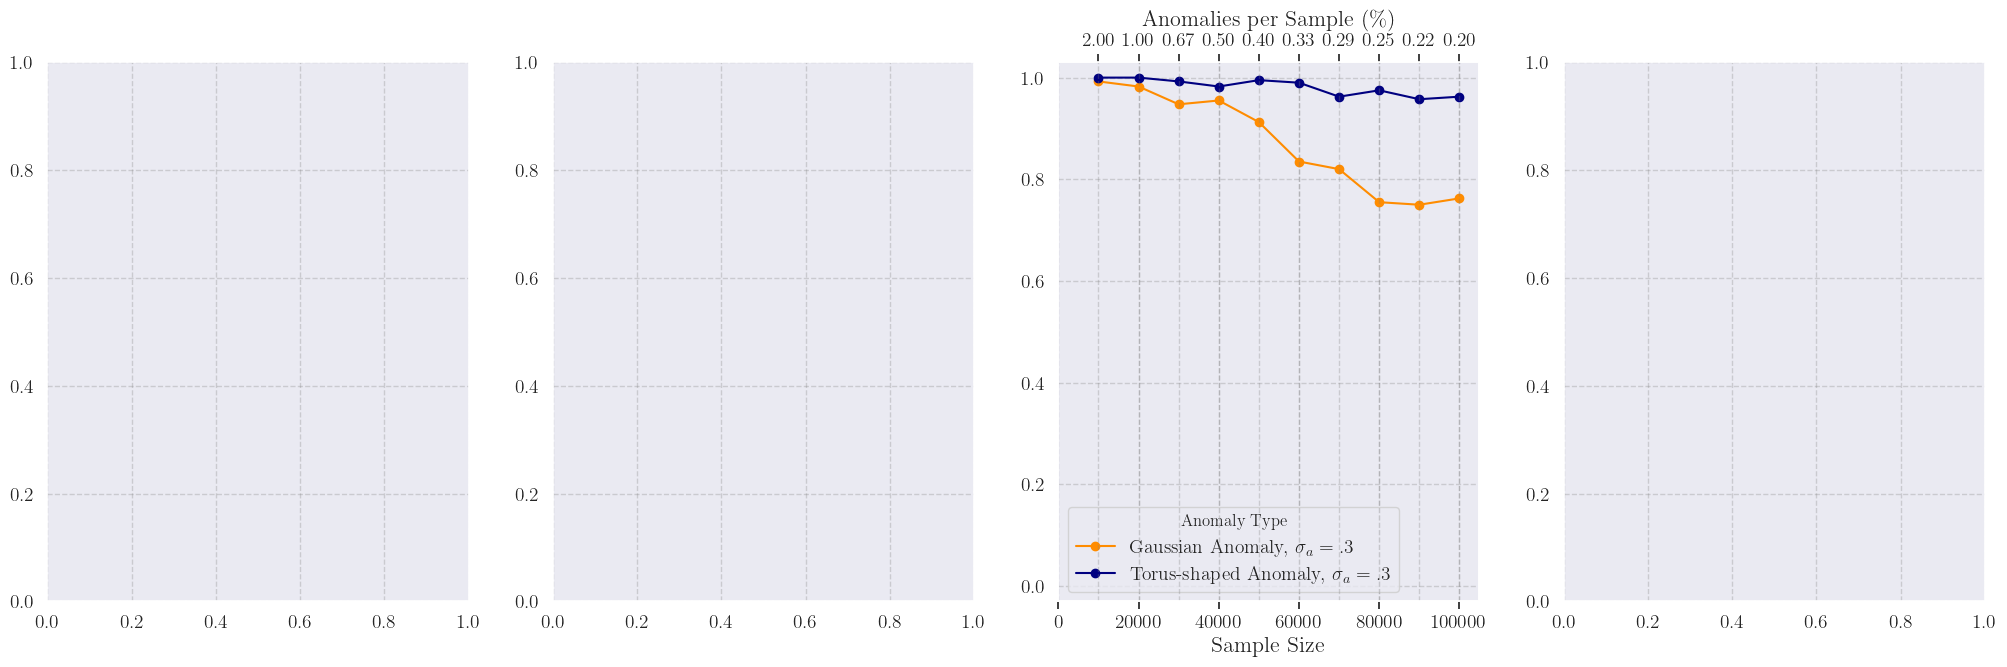

In [73]:
# Create the subplot figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(25, 7))

Samp_Siz_range = range(10000,100000+1,10000)
F5PC1 = F5PC1.mean(axis=1)
F5PC2 = F5PC2.mean(axis=1)
axes[2].plot(Samp_Siz_range, F5PC1, label='Gaussian Anomaly, $\sigma_a = .3$', marker='o', color='darkorange')
axes[2].plot(Samp_Siz_range, F5PC2, label='Torus-shaped Anomaly, $\sigma_a = .3$', marker='o', color='navy')
axes[2].set_xlabel("Sample Size")
axes[2].legend(title='Anomaly Type')
axes[2].set_ylim([-.03, 1.03])
axes[2].set_xlim([-5, 100000+5000])

# Create the second x-axis (twinned axis)
ax2b = axes[2].twiny()

# Match the positions of the ticks
ax2b.set_xticks(range(10000,100000+1,10000))
ax2b.set_xlim(axes[2].get_xlim())  # Align the second x-axis with the first
dilution_percentage = 200/np.array(range(10000,100000+1,10000))*100
# Set the second x-axis to show the dilution of anomalies
ax2b.set_xlabel('Anomalies per Sample ($\%$)')
ax2b.set_xticklabels([f'{d:.2f}%' for d in dilution_percentage])

### 3.3 Fig 5, pannel D


In [76]:
sig = 1.
background_size = 10000
cstd1 = .3 
sigma_a = cstd1 



crit_val = np.quantile( NLPval_bernulli, 0.9999 ) #    11.7
#num_dimensions=10

repp = 2 # number of repetitions

Extra_Dim = range(10,21,1)

F5PD1 = np.zeros( ( len(Extra_Dim), repp) )
F5PD2 = np.zeros( ( len(Extra_Dim), repp) )

for ii in range(len(Extra_Dim)):
    dim, sizes, means, cstd2 = setup_gaussian_components(num_dimensions=Extra_Dim[ii], background_size=background_size, shift_factors = sig)
    

    for jj in range(repp):            
            # loop over repetitions

            if dim<=10:
                covariances = [np.eye(dim), cstd1**2 * np.eye(dim), cstd2 * np.eye(dim)]
            else:
                covariances = [np.eye(dim), np.block([[cstd1**2 * np.eye(10), np.zeros((10, dim - 10))], [np.zeros((dim - 10, 10)), 1. * np.eye(dim - 10)]]), cstd2 * np.eye(dim)]

            reference_data = np.random.multivariate_normal(np.array([0] + [0] * (dim - 1)), np.eye(dim), np.array(sizes).sum())
            
            MSG = generate_gaussian_mixture(dim, sizes, means, covariances)
            
            if dim<=10:
                MST = generate_data_with_torus_anomalies(num_dimensions=10, cluster_sizes=sizes, anomaly_radius=cstd1, shift_factors=sig)
            else:
                MST = generate_data_with_torus_anomalies(num_dimensions=10, cluster_sizes=sizes, anomaly_radius=cstd1, shift_factors=sig)
                MST = np.concatenate( (MST, generate_gaussian_mixture(dim, sizes, means, covariances)[:,10:]), axis=1  )
                
            binary_sequences_anomaly_MSG, _ = From_data_to_binary.create_binary_array_cdist(
                MSG, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MSG, kstar_values_anomaly_MSG = compute_upsilon_values(
                binary_sequences_anomaly_MSG, NEIGHBOR_RANGE, NUM_CORES
            )

            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F5PD1[ii,jj] = TP
                        
            
            binary_sequences_anomaly_MST, _ = From_data_to_binary.create_binary_array_cdist(
                MST, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MST, kstar_values_anomaly_MST = compute_upsilon_values(
                binary_sequences_anomaly_MST, NEIGHBOR_RANGE, NUM_CORES
            )      
            
            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F5PD2[ii,jj] = TP     

Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 3/103
Processing partition 7/103
Processing partition 6/103
Processing partition 5/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 15/103
Processing partition 13/103
Processing partition 14/103
Processing partition 16/103
Processing partition 17/103
Processing partition 18/103
Processing partition 19/103
Processing partition 20/103
Processing partition 21/103
Processing partition 23/103
Processing partition 22/103
Processing partition 24/103
Processing partition 25/103
Processing partition 27/103
Processing partition 26/103
Processing partition 28/103
Processing partition 29/103
Processing partition 30/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 36/103
Processing partition 35/103
P

Processing partition 77/103
Processing partition 78/103
Processing partition 79/103
Processing partition 80/103
Processing partition 81/103
Processing partition 82/103
Processing partition 83/103
Processing partition 84/103
Processing partition 86/103
Processing partition 85/103
Processing partition 88/103
Processing partition 87/103
Processing partition 103/103
Processing partition 90/103
Processing partition 89/103
Processing partition 91/103
Processing partition 92/103
Processing partition 93/103
Processing partition 95/103
Processing partition 94/103
Processing partition 97/103
Processing partition 100/103
Processing partition 99/103
Processing partition 96/103
Processing partition 101/103
Processing partition 98/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partiti

Processing partition 2/103
Processing partition 1/103
Processing partition 3/103
Processing partition 5/103
Processing partition 4/103
Processing partition 7/103
Processing partition 6/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partition 16/103
Processing partition 15/103
Processing partition 17/103
Processing partition 18/103
Processing partition 21/103
Processing partition 20/103
Processing partition 19/103
Processing partition 22/103
Processing partition 23/103
Processing partition 24/103
Processing partition 25/103
Processing partition 26/103
Processing partition 27/103
Processing partition 28/103
Processing partition 29/103
Processing partition 30/103
Processing partition 32/103
Processing partition 31/103
Processing partition 33/103
Processing partition 34/103
Processing partition 35/103
Processing partition 36/103
P

Processing partition 84/103
Processing partition 85/103
Processing partition 86/103
Processing partition 87/103
Processing partition 103/103
Processing partition 88/103
Processing partition 89/103
Processing partition 90/103
Processing partition 91/103
Processing partition 92/103
Processing partition 93/103
Processing partition 97/103
Processing partition 95/103
Processing partition 98/103
Processing partition 96/103
Processing partition 94/103
Processing partition 100/103
Processing partition 99/103
Processing partition 101/103
Processing partition 102/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 

Processing partition 40/103
Processing partition 44/103
Processing partition 41/103
Processing partition 45/103
Processing partition 43/103
Processing partition 42/103
Processing partition 46/103
Processing partition 48/103
Processing partition 47/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 53/103
Processing partition 54/103
Processing partition 52/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 75/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 6/103
Processing partition 4/103
Processing partition 5/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 13/103
Processing partition 12/103
Processing partition 14/103
Processing partiti

Processing partition 40/103
Processing partition 39/103
Processing partition 41/103
Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 52/103
Processing partition 51/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 58/103
Processing partition 56/103
Processing partition 57/103
Processing partition 60/103
Processing partition 59/103
Processing partition 61/103
Processing partition 64/103
Processing partition 62/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 74/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 11/103
Processing partition 10/103
Processing partition 13/103
Processing partition 12/103
Processing partition 14/103
Processing partiti

Processing partition 38/103
Processing partition 37/103
Processing partition 39/103
Processing partition 40/103
Processing partition 41/103
Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 48/103
Processing partition 47/103
Processing partition 49/103
Processing partition 51/103
Processing partition 52/103
Processing partition 50/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 5/103
Processing partition 4/103
Processing partition 7/103
Processing partition 6/103
Processing partition 10/103
Processing partition 8/103
Processing partition 9/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 37/103
Processing partition 38/103
Processing partition 39/103
Processing partition 40/103
Processing partition 41/103
Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 48/103
Processing partition 46/103
Processing partition 49/103
Processing partition 47/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 58/103
Processing partition 57/103
Processing partition 60/103
Processing partition 63/103
Processing partition 59/103
Processing partition 61/103
Processing partition 62/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 70/103
Processing partition 69/103
Processing partition 71/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 4/103
Processing partition 3/103
Processing partition 2/103
Processing partition 5/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 10/103
Processing partition 9/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 33/103
Processing partition 34/103
Processing partition 35/103
Processing partition 36/103
Processing partition 37/103
Processing partition 38/103
Processing partition 39/103
Processing partition 41/103
Processing partition 40/103
Processing partition 42/103
Processing partition 43/103
Processing partition 45/103
Processing partition 44/103
Processing partition 47/103
Processing partition 46/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 58/103
Processing partition 57/103
Processing partition 59/103
Processing partition 60/103
Processing partition 62/103
Processing partition 61/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 12/103
Processing partition 11/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 35/103
Processing partition 36/103
Processing partition 37/103
Processing partition 38/103
Processing partition 39/103
Processing partition 40/103
Processing partition 41/103
Processing partition 42/103
Processing partition 44/103
Processing partition 43/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 51/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 59/103
Processing partition 58/103
Processing partition 60/103
Processing partition 61/103
Processing partition 63/103
Processing partition 62/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 6/103
Processing partition 8/103
Processing partition 5/103
Processing partition 9/103
Processing partition 7/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 33/103
Processing partition 38/103
Processing partition 35/103
Processing partition 34/103
Processing partition 36/103
Processing partition 37/103
Processing partition 39/103
Processing partition 40/103
Processing partition 41/103
Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 46/103
Processing partition 45/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 68/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 6/103
Processing partition 5/103
Processing partition 4/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

(-0.03, 1.03)

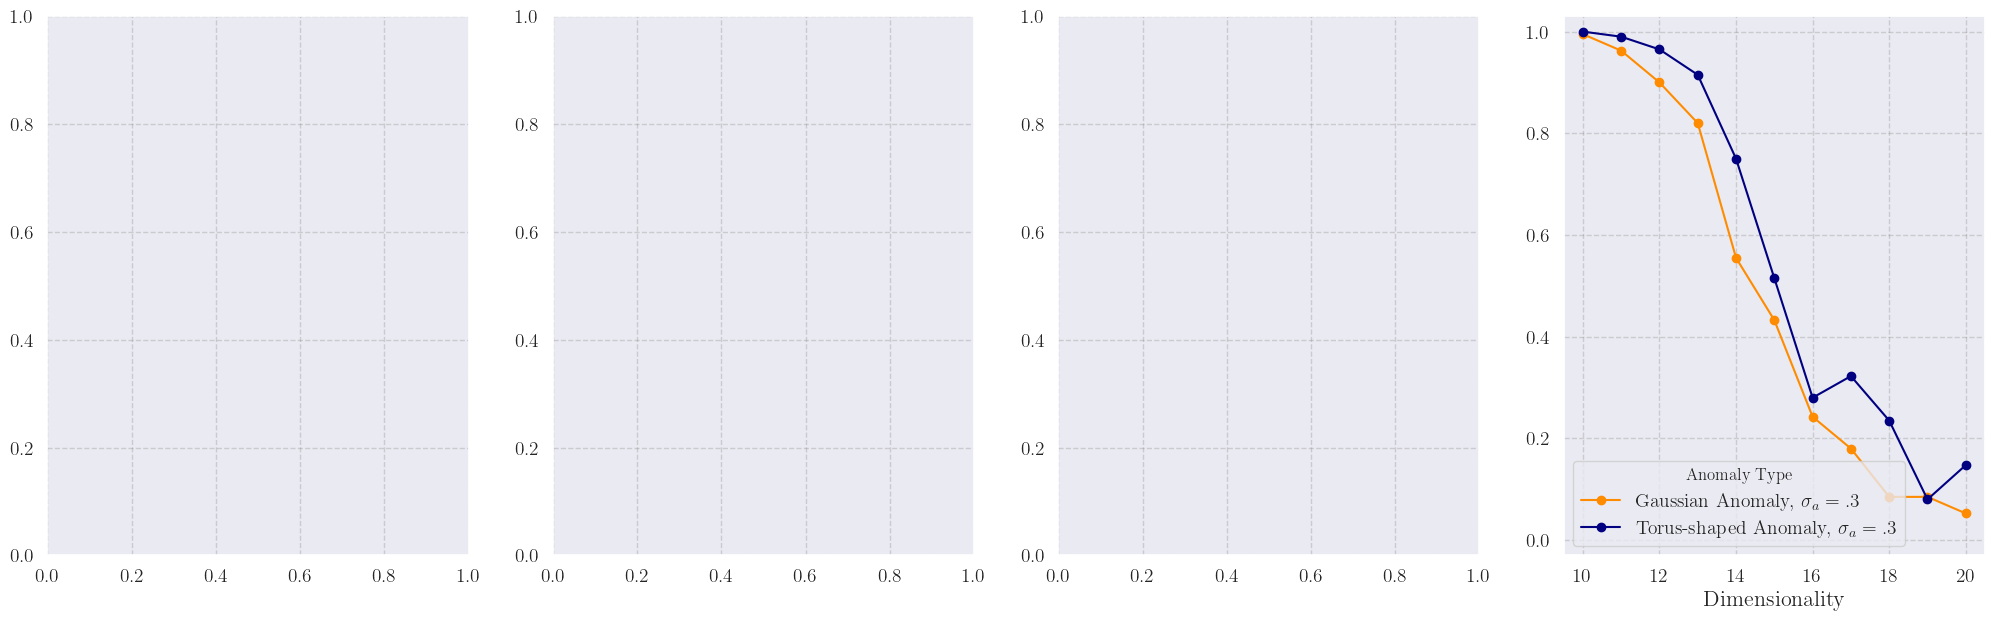

In [77]:
# Create the subplot figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(25, 7))
###
Extra_Dim = range(10,21,1)
F5PD1 = F5PD1.mean(axis=1)
F5PD2 = F5PD2.mean(axis=1)

axes[3].plot(Extra_Dim, F5PD1, label='Gaussian Anomaly, $\sigma_a = .3$', marker='o', color='darkorange')
axes[3].plot(Extra_Dim, F5PD2, label='Torus-shaped Anomaly, $\sigma_a = .3$', marker='o', color='navy')
axes[3].set_xlabel("Dimensionality")
axes[3].legend(title='Anomaly Type')
axes[3].set_ylim([-.03, 1.03])

### 3.4 Fig 6, pannel A 

In [90]:
K_M_range =list(range(100,501,50))
sig = 1.
background_size = 10000
cstd1 = .4 
sigma_a = cstd1 



#crit_val = np.quantile( NLPval_bernulli, 0.9999 ) #    11.7
#num_dimensions=10

repp = 2 # number of repetitions

num_dimensions =10

F6PA1 = np.zeros( ( len(K_M_range), repp) )
F6PA2 = np.zeros( ( len(K_M_range), repp) )

for ii in range(len(K_M_range)):
    dim, sizes, means, cstd2 = setup_gaussian_components(num_dimensions=num_dimensions, background_size=background_size, shift_factors = sig)
    
    NEIGHBOR_RANGE = range(4, K_M_range[ii])
    
    np.random.seed(77)
    bernoulli_matrix = np.random.binomial(n=1, p=0.5, size=(100000, K_M_range[ii]))
    NLPval_bernulli, kstar_bernulli = compute_upsilon_values(bernoulli_matrix, kstar_range=NEIGHBOR_RANGE, num_cores= NUM_CORES)
    quantiles = [ 0.999, 0.9995, 0.9999, 0.99995,0.99999]
    quantiles_tbp = np.quantile( NLPval_bernulli, quantiles )  
    np.random.seed()
    crit_val = quantiles_tbp[2]

    for jj in range(repp):            
            # loop over repetitions
            covariances = [np.eye(dim), cstd1**2 * np.eye(dim), cstd2 * np.eye(dim)]

            reference_data = np.random.multivariate_normal(np.array([0] + [0] * (dim - 1)), np.eye(dim), np.array(sizes).sum())
            
            MSG = generate_gaussian_mixture(dim, sizes, means, covariances)
            MST = generate_data_with_torus_anomalies(num_dimensions=dim, cluster_sizes=sizes, anomaly_radius=cstd1, shift_factors=sig)

            binary_sequences_anomaly_MSG, _ = From_data_to_binary.create_binary_array_cdist(
                MSG, reference_data, num_neighbors=K_M_range[ii], num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MSG, kstar_values_anomaly_MSG = compute_upsilon_values(
                binary_sequences_anomaly_MSG, NEIGHBOR_RANGE, NUM_CORES
            )

            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F6PA1[ii,jj] = TP
                        
            
            binary_sequences_anomaly_MST, _ = From_data_to_binary.create_binary_array_cdist(
                MST, reference_data, num_neighbors=K_M_range[ii], num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MST, kstar_values_anomaly_MST = compute_upsilon_values(
                binary_sequences_anomaly_MST, NEIGHBOR_RANGE, NUM_CORES
            )      
            
            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F6PA2[ii,jj] = TP  

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 4/103
Processing partition 7/103
Processing partition 6/103
Processing partition 5/103
Processing partition 8/103
Processing partition 9/103
Processing partition 11/103
Processing partition 10/103
Processing partition 13/103
Processing partition 12/103
Processing partition 15/103
Processing partiti

Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 49/103
Processing partition 48/103
Processing partition 50/103
Processing partition 47/103
Processing partition 51/103
Processing partition 53/103
Processing partition 52/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 59/103
Processing partition 58/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 68/103
Processing partition 67/103
Processing partition 69/103
Processing partition 70/103
Processing partition 72/103
Processing partition 71/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition

Processing partition 82/103
Processing partition 83/103
Processing partition 85/103
Processing partition 84/103
Processing partition 86/103
Processing partition 87/103
Processing partition 88/103
Processing partition 90/103
Processing partition 92/103
Processing partition 91/103
Processing partition 103/103
Processing partition 89/103
Processing partition 93/103
Processing partition 94/103
Processing partition 96/103
Processing partition 95/103
Processing partition 97/103
Processing partition 98/103
Processing partition 99/103
Processing partition 100/103
Processing partition 102/103
Processing partition 101/103
Processing partition 1/17 completed.
Processing partition 2/17 completed.
Processing partition 3/17 completed.
Processing partition 4/17 completed.
Processing partition 5/17 completed.
Processing partition 6/17 completed.
Processing partition 7/17 completed.
Processing partition 8/17 completed.
Processing partition 9/17 completed.
Processing partition 10/17 completed.
Processin

Processing partition 1/103
Processing partition 2/103
Processing partition 5/103
Processing partition 4/103
Processing partition 3/103
Processing partition 7/103
Processing partition 8/103
Processing partition 6/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 14/103
Processing partition 13/103
Processing partition 15/103
Processing partition 16/103
Processing partition 17/103
Processing partition 19/103
Processing partition 18/103
Processing partition 20/103
Processing partition 23/103
Processing partition 21/103
Processing partition 22/103
Processing partition 24/103
Processing partition 25/103
Processing partition 26/103
Processing partition 27/103
Processing partition 28/103
Processing partition 29/103
Processing partition 30/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 36/103
Processing partition 35/103
P

Processing partition 41/103
Processing partition 40/103
Processing partition 42/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 47/103
Processing partition 46/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 64/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 71/103
Processing partition 70/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition

Processing partition 1/17 completed.
Processing partition 2/17 completed.
Processing partition 3/17 completed.
Processing partition 4/17 completed.
Processing partition 5/17 completed.
Processing partition 6/17 completed.
Processing partition 7/17 completed.
Processing partition 8/17 completed.
Processing partition 9/17 completed.
Processing partition 10/17 completed.
Processing partition 11/17 completed.
Processing partition 12/17 completed.
Processing partition 13/17 completed.
Processing partition 14/17 completed.
Processing partition 15/17 completed.
Processing partition 16/17 completed.
Processing partition 17/17 completed.
Processing partition 1/17 completed.
Processing partition 2/17 completed.
Processing partition 3/17 completed.
Processing partition 4/17 completed.
Processing partition 5/17 completed.
Processing partition 6/17 completed.
Processing partition 7/17 completed.
Processing partition 8/17 completed.
Processing partition 9/17 completed.
Processing partition 10/17 com

Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 14/103
Processing partition 13/103
Processing partition 15/103
Processing partition 16/103
Processing partition 18/103
Processing partition 17/103
Processing partition 19/103
Processing partition 20/103
Processing partition 21/103
Processing partition 22/103
Processing partition 23/103
Processing partition 24/103
Processing partition 25/103
Processing partition 29/103
Processing partition 28/103
Processing partition 27/103
Processing partition 26/103
Processing partition 30/103
Processing partition 31/103
Processing partition 32/103
Processing partition 33/103
Processing partition 34/103
Processing partition 35/103
Processing partition 36/103
P

Processing partition 39/103
Processing partition 41/103
Processing partition 42/103
Processing partition 40/103
Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 58/103
Processing partition 56/103
Processing partition 55/103
Processing partition 54/103
Processing partition 59/103
Processing partition 57/103
Processing partition 60/103
Processing partition 62/103
Processing partition 63/103
Processing partition 61/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 73/103
Processing partition 72/103
Processing partition

Processing partition 1/17 completed.
Processing partition 2/17 completed.
Processing partition 3/17 completed.
Processing partition 4/17 completed.
Processing partition 5/17 completed.
Processing partition 6/17 completed.
Processing partition 7/17 completed.
Processing partition 8/17 completed.
Processing partition 9/17 completed.
Processing partition 10/17 completed.
Processing partition 11/17 completed.
Processing partition 12/17 completed.
Processing partition 13/17 completed.
Processing partition 14/17 completed.
Processing partition 15/17 completed.
Processing partition 16/17 completed.
Processing partition 17/17 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 4/103
Processing partition 5/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 11/103
Processing partition 10/103
Processing partition 12/103
Processing partition 13/103
Processi

Processing partition 3/103
Processing partition 1/103
Processing partition 4/103
Processing partition 2/103
Processing partition 5/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 14/103
Processing partition 11/103
Processing partition 15/103
Processing partition 12/103
Processing partition 13/103
Processing partition 17/103
Processing partition 16/103
Processing partition 18/103
Processing partition 19/103
Processing partition 20/103
Processing partition 21/103
Processing partition 22/103
Processing partition 23/103
Processing partition 24/103
Processing partition 26/103
Processing partition 27/103
Processing partition 25/103
Processing partition 28/103
Processing partition 29/103
Processing partition 31/103
Processing partition 30/103
Processing partition 33/103
Processing partition 32/103
Processing partition 34/103
Processing partition 35/103
Processing partition 36/103
P

Processing partition 81/103
Processing partition 82/103
Processing partition 85/103
Processing partition 83/103
Processing partition 84/103
Processing partition 86/103
Processing partition 87/103
Processing partition 88/103
Processing partition 89/103
Processing partition 103/103
Processing partition 90/103
Processing partition 91/103
Processing partition 92/103
Processing partition 93/103
Processing partition 95/103
Processing partition 94/103
Processing partition 96/103
Processing partition 98/103
Processing partition 97/103
Processing partition 99/103
Processing partition 100/103
Processing partition 101/103
Processing partition 102/103
Processing partition 1/17 completed.
Processing partition 2/17 completed.
Processing partition 3/17 completed.
Processing partition 4/17 completed.
Processing partition 5/17 completed.
Processing partition 6/17 completed.
Processing partition 7/17 completed.
Processing partition 8/17 completed.
Processing partition 9/17 completed.
Processing partitio

Processing partition 1/17 completed.
Processing partition 2/17 completed.
Processing partition 3/17 completed.
Processing partition 4/17 completed.
Processing partition 5/17 completed.
Processing partition 6/17 completed.
Processing partition 7/17 completed.
Processing partition 8/17 completed.
Processing partition 9/17 completed.
Processing partition 10/17 completed.
Processing partition 11/17 completed.
Processing partition 12/17 completed.
Processing partition 13/17 completed.
Processing partition 14/17 completed.
Processing partition 15/17 completed.
Processing partition 16/17 completed.
Processing partition 17/17 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 5/103
Processing partition 3/103
Processing partition 6/103
Processing partition 7/103
Processing partition 9/103
Processing partition 8/103
Processing partition 10/103
Processing partition 11/103
Processing partition 13/103
Processing partition 12/103
Processi

Processing partition 16/17 completed.
Processing partition 17/17 completed.
Processing partition 1/103
Processing partition 3/103
Processing partition 2/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 8/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 13/103
Processing partition 15/103
Processing partition 16/103
Processing partition 12/103
Processing partition 14/103
Processing partition 17/103
Processing partition 18/103
Processing partition 19/103
Processing partition 20/103
Processing partition 21/103
Processing partition 24/103
Processing partition 22/103
Processing partition 25/103
Processing partition 23/103
Processing partition 28/103
Processing partition 27/103
Processing partition 26/103
Processing partition 29/103
Processing partition 31/103
Processing partition 30/103
Processing partition 32/103
Processing partition 33/103
Processin

Processing partition 76/103
Processing partition 72/103
Processing partition 77/103
Processing partition 78/103
Processing partition 79/103
Processing partition 80/103
Processing partition 81/103
Processing partition 84/103
Processing partition 83/103
Processing partition 85/103
Processing partition 82/103
Processing partition 86/103
Processing partition 87/103
Processing partition 88/103
Processing partition 89/103
Processing partition 90/103
Processing partition 91/103
Processing partition 92/103
Processing partition 103/103
Processing partition 94/103
Processing partition 93/103
Processing partition 95/103
Processing partition 97/103
Processing partition 96/103
Processing partition 99/103
Processing partition 98/103
Processing partition 100/103
Processing partition 101/103
Processing partition 102/103
Processing partition 1/17 completed.
Processing partition 2/17 completed.
Processing partition 3/17 completed.
Processing partition 4/17 completed.
Processing partition 5/17 completed.

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 4/103
Processing partition 5/103
Processing partition 3/103
Processing partition 6/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 8/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 33/103
Processing partition 32/103
Processing partition 34/103
Processing partition 35/103
Processing partition 38/103
Processing partition 37/103
Processing partition 36/103
Processing partition 39/103
Processing partition 40/103
Processing partition 41/103
Processing partition 42/103
Processing partition 43/103
Processing partition 45/103
Processing partition 46/103
Processing partition 44/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 51/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 58/103
Processing partition 60/103
Processing partition 59/103
Processing partition 61/103
Processing partition 62/103
Processing partition 64/103
Processing partition 63/103
Processing partition 65/103
Processing partition 66/103
Processing partition

(-0.03, 1.03)

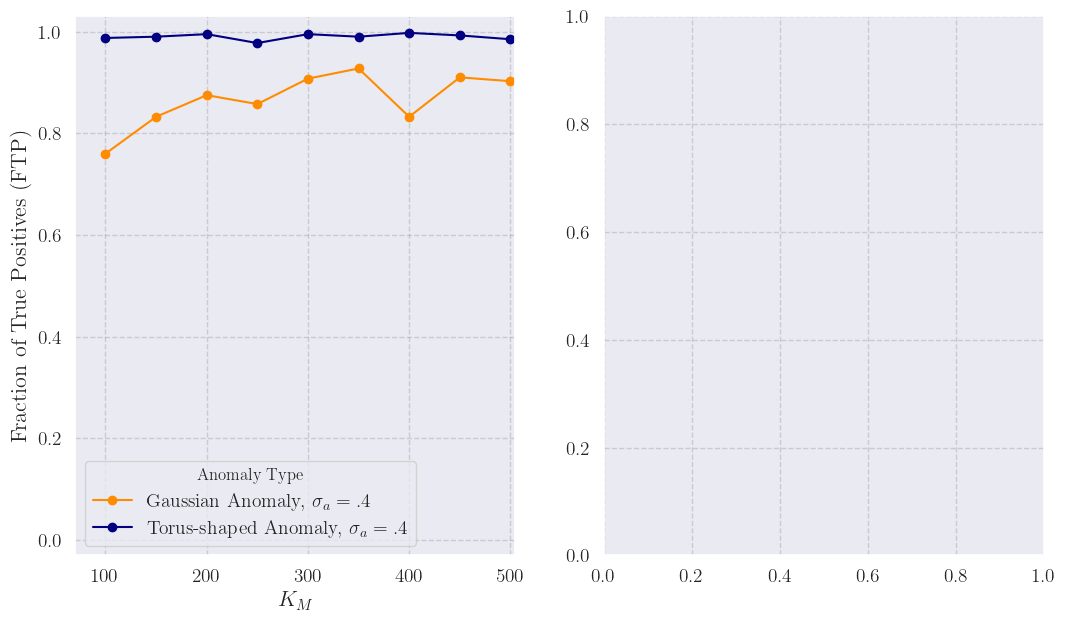

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12.5, 7))


axes[0].plot(K_M_range, F6PA1.mean(axis=1), label='Gaussian Anomaly, $\sigma_a = .4$', marker='o', color='darkorange')
axes[0].plot(K_M_range, F6PA2.mean(axis=1), label='Torus-shaped Anomaly, $\sigma_a = .4$', marker='o', color='navy')
axes[0].set_xlabel("$K_M$")
axes[0].set_ylabel("Fraction of True Positives (FTP)")
axes[0].legend(title='Anomaly Type')
axes[0].set_xlim([K_M_range[0]-30, K_M_range[-1]+5])
axes[0].set_ylim([-.03, 1.03])


### 3.5 Fig 6, pannel B

In [92]:
K_M            = 100
NUM_CORES      = 16
NEIGHBOR_RANGE = range(4, K_M)

np.random.seed(77)
bernoulli_matrix = np.random.binomial(n=1, p=0.5, size=(200000, K_M))
NLPval_bernulli, kstar_bernulli = compute_upsilon_values(bernoulli_matrix, kstar_range=NEIGHBOR_RANGE, num_cores= NUM_CORES)
quantiles = [ 0.999, 0.9995, 0.9999, 0.99995,0.99999]
quantiles_tbp = np.quantile( NLPval_bernulli, quantiles )  
np.random.seed()

sig = 1.
background_size = 10000
cstd1 = .4 
sigma_a = cstd1 



#num_dimensions=10

repp = 2 # number of repetitions

num_dimensions =10

F6PB1 = np.zeros( ( len(quantiles), repp) )
F6PB2 = np.zeros( ( len(quantiles), repp) )

for ii in range(len(quantiles)):
    dim, sizes, means, cstd2 = setup_gaussian_components(num_dimensions=num_dimensions, background_size=background_size, shift_factors = sig)
    


    crit_val = quantiles_tbp[ii]

    for jj in range(repp):            
            # loop over repetitions

            if dim<=10:
                covariances = [np.eye(dim), cstd1**2 * np.eye(dim), cstd2 * np.eye(dim)]
            else:
                covariances = [np.eye(dim), np.block([[cstd1**2 * np.eye(10), np.zeros((10, dim - 10))], [np.zeros((dim - 10, 10)), 1. * np.eye(dim - 10)]]), cstd2 * np.eye(dim)]

            reference_data = np.random.multivariate_normal(np.array([0] + [0] * (dim - 1)), np.eye(dim), np.array(sizes).sum())
            
            MSG = generate_gaussian_mixture(dim, sizes, means, covariances)
            MST = generate_data_with_torus_anomalies(num_dimensions=dim, cluster_sizes=sizes, anomaly_radius=cstd1, shift_factors=sig)

            binary_sequences_anomaly_MSG, _ = From_data_to_binary.create_binary_array_cdist(
                MSG, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MSG, kstar_values_anomaly_MSG = compute_upsilon_values(
                binary_sequences_anomaly_MSG, NEIGHBOR_RANGE, NUM_CORES
            )

            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MSG>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F6PB1[ii,jj] = TP
                        
            
            binary_sequences_anomaly_MST, _ = From_data_to_binary.create_binary_array_cdist(
                MST, reference_data, num_neighbors=K_M, num_cores=NUM_CORES
            )
            upsilon_values_anomaly_MST, kstar_values_anomaly_MST = compute_upsilon_values(
                binary_sequences_anomaly_MST, NEIGHBOR_RANGE, NUM_CORES
            )      
            
            if sizes[2]==1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sizes[0],sum(sizes[:2]) ) )).shape[0]/200
            elif sizes[2]>1:
                TP = np.intersect1d(np.where( upsilon_values_anomaly_MST>crit_val ), np.array(range(sum(sizes[:2]),sum(sizes) ) )).shape[0]/200
            F6PB2[ii,jj] = TP 

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 5/103
Processing partition 8/103
Processing partition 6/103
Processing partition 7/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 12/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 39/103
Processing partition 42/103
Processing partition 41/103
Processing partition 44/103
Processing partition 43/103
Processing partition 45/103
Processing partition 48/103
Processing partition 47/103
Processing partition 49/103
Processing partition 46/103
Processing partition 50/103
Processing partition 53/103
Processing partition 51/103
Processing partition 52/103
Processing partition 54/103
Processing partition 56/103
Processing partition 55/103
Processing partition 57/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition

Processing partition 86/103
Processing partition 88/103
Processing partition 103/103
Processing partition 87/103
Processing partition 89/103
Processing partition 92/103
Processing partition 90/103
Processing partition 93/103
Processing partition 96/103
Processing partition 94/103
Processing partition 91/103
Processing partition 97/103
Processing partition 95/103
Processing partition 99/103
Processing partition 100/103
Processing partition 98/103
Processing partition 102/103
Processing partition 101/103
Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Process

Processing partition 42/103
Processing partition 44/103
Processing partition 43/103
Processing partition 45/103
Processing partition 46/103
Processing partition 47/103
Processing partition 48/103
Processing partition 49/103
Processing partition 51/103
Processing partition 50/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 56/103
Processing partition 57/103
Processing partition 59/103
Processing partition 58/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 72/103
Processing partition 71/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 2/103
Processing partition 3/103
Processing partition 1/103
Processing partition 5/103
Processing partition 4/103
Processing partition 6/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 12/103
Processing partition 11/103
Processing partition 13/103
Processing partition 14/103
Processing partiti

Processing partition 43/103
Processing partition 44/103
Processing partition 45/103
Processing partition 47/103
Processing partition 46/103
Processing partition 48/103
Processing partition 49/103
Processing partition 50/103
Processing partition 54/103
Processing partition 52/103
Processing partition 51/103
Processing partition 53/103
Processing partition 55/103
Processing partition 58/103
Processing partition 57/103
Processing partition 56/103
Processing partition 60/103
Processing partition 59/103
Processing partition 62/103
Processing partition 61/103
Processing partition 63/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 67/103
Processing partition 68/103
Processing partition 70/103
Processing partition 69/103
Processing partition 71/103
Processing partition 72/103
Processing partition 73/103
Processing partition 74/103
Processing partition 75/103
Processing partition 76/103
Processing partition 77/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.
Processing partition 1/103
Processing partition 2/103
Processing partition 3/103
Processing partition 4/103
Processing partition 6/103
Processing partition 5/103
Processing partition 7/103
Processing partition 8/103
Processing partition 9/103
Processing partition 10/103
Processing partition 11/103
Processing partition 13/103
Processing partition 15/103
Processing partition 14/103
Processing partiti

Processing partition 39/103
Processing partition 41/103
Processing partition 40/103
Processing partition 42/103
Processing partition 45/103
Processing partition 44/103
Processing partition 46/103
Processing partition 43/103
Processing partition 47/103
Processing partition 48/103
Processing partition 50/103
Processing partition 49/103
Processing partition 51/103
Processing partition 52/103
Processing partition 53/103
Processing partition 54/103
Processing partition 55/103
Processing partition 57/103
Processing partition 56/103
Processing partition 58/103
Processing partition 59/103
Processing partition 60/103
Processing partition 61/103
Processing partition 62/103
Processing partition 63/103
Processing partition 67/103
Processing partition 64/103
Processing partition 65/103
Processing partition 66/103
Processing partition 68/103
Processing partition 69/103
Processing partition 70/103
Processing partition 71/103
Processing partition 72/103
Processing partition 75/103
Processing partition

Processing partition 1/16 completed.
Processing partition 2/16 completed.
Processing partition 3/16 completed.
Processing partition 4/16 completed.
Processing partition 5/16 completed.
Processing partition 6/16 completed.
Processing partition 7/16 completed.
Processing partition 8/16 completed.
Processing partition 9/16 completed.
Processing partition 10/16 completed.
Processing partition 11/16 completed.
Processing partition 12/16 completed.
Processing partition 13/16 completed.
Processing partition 14/16 completed.
Processing partition 15/16 completed.
Processing partition 16/16 completed.


(-0.03, 1.03)

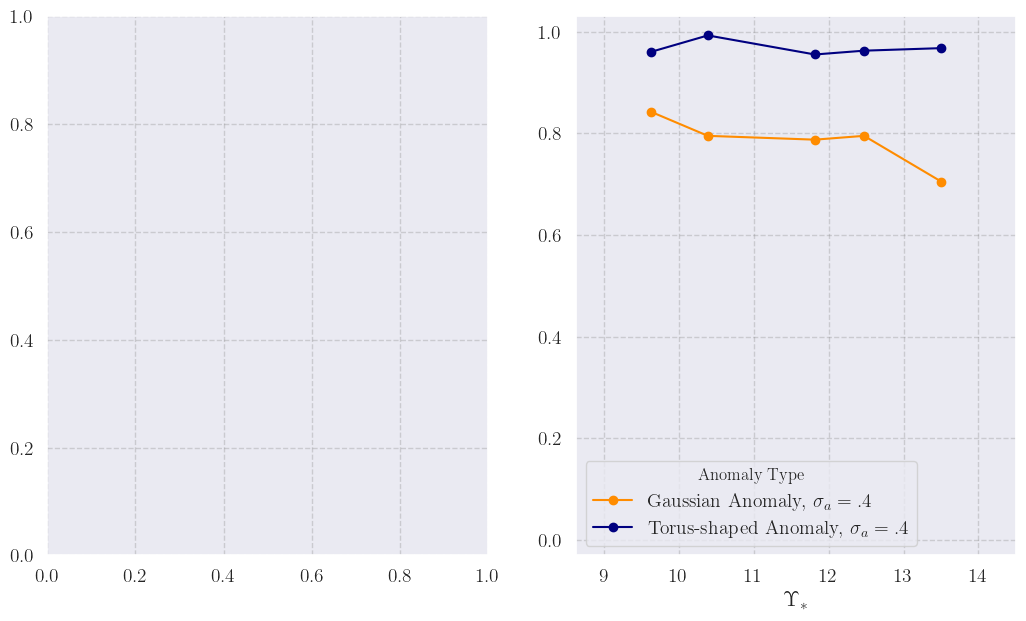

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12.5, 7))



axes[1].plot(quantiles_tbp, F6PB1.mean(axis=1), label='Gaussian Anomaly, $\sigma_a = .4$', marker='o', color='darkorange')
axes[1].plot(quantiles_tbp, F6PB2.mean(axis=1), label='Torus-shaped Anomaly, $\sigma_a = .4$', marker='o', color='navy')
axes[1].set_xlabel(r'$\Upsilon_{*}$')
axes[1].legend(title='Anomaly Type')
axes[1].set_xlim([quantiles_tbp[0]-1, quantiles_tbp[-1]+1])
axes[1].set_ylim([-.03, 1.03])